# <span style="color: green; font-size: 40px; font-weight: bold;"> Projeto 1 (Regressão) </span>

<br><br>

# Prevendo o Valor de Propriedades Imobiliárias

<br><br>

### Contexto

- Uma empresa de corretagem imobiliária está procurando melhorar suas estimativas de preços de venda para propriedades residenciais. Eles querem usar um modelo de regressão para prever o valor de uma casa com base em várias características.
- O **objetivo** é ajudar os corretores a fornecer estimativas de preço mais precisas para seus clientes e, assim, fechar negócios mais rapidamente.

<br>

### Problema de Negócio
- Como podemos prever o valor de venda de uma propriedade residencial com base em suas características?

<br>

### Sobre o Conjunto de Dados

O conjunto de dados simulado terá 10.000 linhas e incluirá as seguintes colunas:

- **area (float)**: Área da propriedade em metros quadrados.
- **bedrooms (int)**: Número de quartos.
- **bathrooms (int)**: Número de banheiros.
- **floors (int)**: Número de andares.
- **year_built (int)**: Ano de construção.
- **location (str)**: Localização da propriedade (bairro ou cidade).
- **garage (int)**: Número de vagas na garagem.
- **value (float)**: Valor de venda da propriedade (variável alvo).

<br><br>

## Importando Pacotes

In [1]:
### Manipulação de Dados ###

# NumPy: Biblioteca para operações matemáticas e manipulação de arrays.
import numpy as np
# Pandas: Biblioteca para manipulação e análise de dados estruturados.
import pandas as pd


### Exibição de Gráficos ###

# Matplotlib: Biblioteca para criação de gráficos e visualizações.
import matplotlib.pyplot as plt
# Seaborn: Biblioteca para criação de gráficos estatísticos e visualizações.
import seaborn as sns


### Machine Learning ###

# Scikit-learn: Biblioteca para ML, incluindo ferramentas para pré-processamento, modelagem, e avaliação.
import sklearn
# Train Test Split: Função para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split
# StandardScaler: Ferramenta para padronização de recursos, ajustando a média e a variância.
from sklearn.preprocessing import StandardScaler
# LinearRegression, Ridge, Lasso: Algoritmos de regressão linear, incluindo regularização L2 (Ridge) e L1 (Lasso).
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Seleção de Hiperparâmetros
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import ElasticNet            # Algoritmo de Regressão
from sklearn.tree import DecisionTreeRegressor         # Algoritmo de Regressão

from sklearn.ensemble import RandomForestRegressor     # Algoritmo de Regressão
from sklearn.svm import SVR                            # Algoritmo de Regressão

from sklearn.neighbors import KNeighborsRegressor      # Algoritmo de Regressão
from sklearn.ensemble import GradientBoostingRegressor # Algoritmo de Regressão
import xgboost as xgb                                  # Algoritmo de Regressão


### Avaliação de Modelos ### 

# Métricas para avaliar o desempenho
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


### Configurações Adicionais ###

# Configuração de estilo para visualizações Seaborn.
sns.set_style('whitegrid')
# Inline: Para exibir gráficos diretamente no Jupyter Notebook.
%matplotlib inline
# Warnings: Biblioteca para gerenciar mensagens de aviso, aqui usada para ignorar avisos futuros.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignorando avisos de depreciação
warnings.filterwarnings("ignore", category=DeprecationWarning)

<br><br>

## Carregando Conjunto de Dados

In [2]:
# Carrega o dataset
dados = pd.read_csv('dados/imoveis.csv')

In [3]:
# Visualiza
dados.head()

,area,bedrooms,bathrooms,floors,year_built,location,garage,value
0,174.835708,2.0,2.0,2.0,1919.0,Zona Norte,3.0,664379.908882
1,143.086785,1.0,1.0,2.0,1959.0,Zona Norte,0.0,501897.679702
2,182.384427,5.0,2.0,1.0,1939.0,Centro,1.0,803255.932459
3,226.151493,2.0,3.0,1.0,1982.0,Zona Oeste,2.0,922852.429946
4,138.292331,1.0,2.0,1.0,2001.0,Centro,1.0,433672.784015


In [4]:
# Info
dados.info()

# Verifica se há valores ausentes e duplicados
valores_ausentes = dados.isna().sum().sum() > 0
valores_duplicados = dados.duplicated().sum() > 0

# Exibe o resultado
print(f"\n\nExistem valores ausentes: {valores_ausentes}")
print(f"Existem valores duplicados: {valores_duplicados}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        10000 non-null  float64
 1   bedrooms    9998 non-null   float64
 2   bathrooms   9997 non-null   float64
 3   floors      10100 non-null  float64
 4   year_built  9999 non-null   float64
 5   location    10100 non-null  object 
 6   garage      9999 non-null   float64
 7   value       10100 non-null  float64
dtypes: float64(7), object(1)
memory usage: 631.4+ KB


Existem valores ausentes: True
Existem valores duplicados: True


> Existem valores ausentes.

<br>

### Ordem Recomendada das Etapas de Pré-Processamento:

- **Realizar Análise Exploratória** - Realizar Análise Exploratória das Variáveis Numéricas e Categóricas
- **Transformação de Variáveis Categóricas**: Converter variáveis categóricas em numéricas.
- **Tratamento de Valores Ausentes**: Lidar com valores ausentes primeiro garante que as próximas etapas possam ser aplicadas a um conjunto de dados completo e correto.
- **Tratamento de Outliers**: Identificar e tratar outliers evita que esses valores influenciem negativamente as transformações e modelagens subsequentes.
- **Verificação de Correlação**: Avaliar a correlação entre as variáveis para entender suas relações e evitar multicolinearidade.
- **Divisão em Conjuntos de Treino e Teste**: Separar os dados em conjuntos de treino e teste antes de aplicar técnicas de modelagem.
- **Escalonamento de Dados**: Normalizar ou padronizar os dados para garantir que todas as variáveis estejam na mesma escala, especialmente importante para modelos baseados em distância.


<br><br>
## Análise Exploratória de Dados

In [5]:
# Nome das colunas
dados.columns

Index(['area', 'bedrooms', 'bathrooms', 'floors', 'year_built', 'location',
       'garage', 'value'],
      dtype='object')

#### Visualizando Variáveis Categóricas e Numéricas

In [6]:
# Exibindo Variáveis Categóricas (filtrando)
dados.dtypes[dados.dtypes == 'object']

location    object
dtype: object

In [7]:
# Exibindo Variáveis Numéricas (filtrando)
dados.dtypes[dados.dtypes != 'object']

area          float64
bedrooms      float64
bathrooms     float64
floors        float64
year_built    float64
garage        float64
value         float64
dtype: object

<br><br>

### Explorando Variáveis Numéricas

#### Resumo Estatístico

In [8]:
dados.describe()

,area,bedrooms,bathrooms,floors,year_built,garage,value
count,10000.000000,9998.000000,9997.000000,10100.000000,9999.000000,9999.00000,1.010000e+04
mean,150.390483,2.997600,1.992198,1.508812,1960.034203,1.49625,6.552605e+05
std,49.231224,1.409677,0.824021,0.499947,35.329929,1.11786,1.908042e+05
min,50.000000,1.000000,1.000000,1.000000,1900.000000,0.00000,6.927193e+04
25%,116.347417,2.000000,1.000000,1.000000,1929.000000,1.00000,5.291141e+05
50%,150.063279,3.000000,2.000000,2.000000,1960.000000,1.00000,6.521742e+05
75%,183.662711,4.000000,3.000000,2.000000,1991.000000,3.00000,7.731492e+05
max,346.311885,5.000000,3.000000,2.000000,2020.000000,3.00000,3.379100e+06


#### Visualizando através de Gráficos

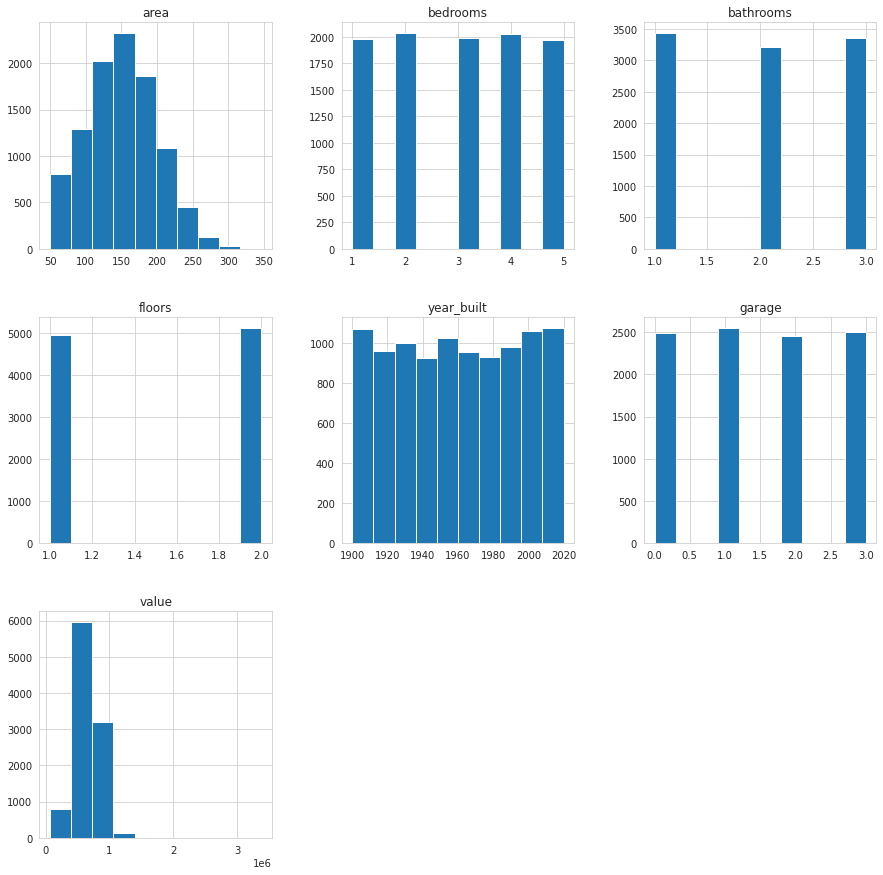

In [9]:
# Plot
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

#### Interpretando o Resumo e Gráficos

- **area**: A variável área parece estar bem distribuída, mas com um pico em torno de 150 m². **Não há muitos outliers**, mas a **dispersão é alta**, indicando uma **variação significativa nas áreas das propriedades**.

<br>

- **bedrooms**: A distribuição do número de quartos é bastante uniforme, com uma leve concentração em 3 quartos. Isso sugere que **a maioria das propriedades tem entre 2 a 4 quartos**. **Outliers não são um problema** significativo aqui.

<br>

- **bathrooms**: A distribuição do número de banheiros também é uniforme, com uma **leve concentração em 2 banheiros**. As propriedades geralmente têm entre 1 a 3 banheiros, **sem outliers significativos**.

<br>

- **floors**: Há uma **distribuição binária entre 1 e 2 andares**, com uma ligeira predominância de propriedades de 2 andares. **Não há outliers, pois a variável é discreta e limitada**.

<br>

- **year_built**: A idade das propriedades está bem distribuída ao longo do século passado. **Não há outliers claros**, mas a dispersão é ampla, indicando uma mistura de propriedades novas e antigas.

<br>

- **garage**: A distribuição do número de vagas na garagem é relativamente uniforme, com uma leve concentração em 1 e 3 vagas. **Não há outliers** significativos.

<br>

- **value**: O valor das propriedades apresenta uma **distribuição assimétrica com uma cauda longa à direita**, indicando a **presença de outliers de alto valor**. Isso sugere que algumas propriedades são significativamente mais caras que a maioria.

#### Conclusão:

- Há **outliers notáveis na variável "value"**, que poderão necessitar de tratamento específico. As demais variáveis apresentam distribuições razoavelmente uniformes ou binárias sem outliers significativos.

<br><br>

### Explorando Variável Categórica

#### Resumo Estatístico

In [10]:
# Describe (informando que é para somente variáveis categóricas)
dados.describe(include = ['object'])

,location
count,10100
unique,5
top,Zona Oeste
freq,2082


In [11]:
# Verificando Tipo de Valores
dados['location'].unique()

array(['Zona Norte', 'Centro', 'Zona Oeste', 'Zona Sul', 'Zona Leste'],
      dtype=object)

#### Visualizando através de Gráfico

Número de propriedades na Zona Oeste: 2082
Número de propriedades na Centro: 2046
Número de propriedades na Zona Sul: 2016
Número de propriedades na Zona Norte: 1997
Número de propriedades na Zona Leste: 1959


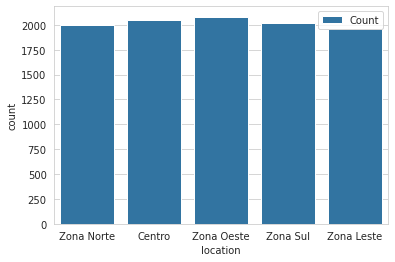

In [12]:
# Plot
sns.countplot(data = dados, x = 'location', label = 'Count')

# Value counts
location_counts = dados['location'].value_counts()

# Print
for location, count in location_counts.items():
    print(f'Número de propriedades na {location}: {count}')

### Aplicando Label Encoding
#### Vamos transformar a variável **Categórica** Gender na sua represetação **Numérica**

In [13]:
# Função para label encoding ('Centro' = 0, 'Zona Norte' = 1, 'Zona Sul' = 2, 'Zona Leste' = 3, 'Zona Oeste' = 4)
def encoding_func(x):
    if x == 'Centro':
        return 0
    elif x == 'Zona Norte':
        return 1
    elif x == 'Zona Sul':
        return 2
    elif x == 'Zona Leste':
        return 3
    elif x == 'Zona Oeste':
        return 4

# Aplica a função
dados['location'] = dados['location'].map(encoding_func)

# Verificando info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        10000 non-null  float64
 1   bedrooms    9998 non-null   float64
 2   bathrooms   9997 non-null   float64
 3   floors      10100 non-null  float64
 4   year_built  9999 non-null   float64
 5   location    10100 non-null  int64  
 6   garage      9999 non-null   float64
 7   value       10100 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 631.4 KB


In [14]:
# Visualiza os dados
dados.sample(3)

,area,bedrooms,bathrooms,floors,year_built,location,garage,value
4013,159.934000,1.0,2.0,1.0,1949.0,4,2.0,617169.449088
1559,136.443820,NaN,2.0,1.0,1987.0,0,0.0,645843.746876
4480,90.273853,4.0,3.0,2.0,1988.0,0,0.0,542565.750543


<br>

# Limpeza nos Dados

<br>

### Tratando Valores Ausentes

In [15]:
# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

area          100
bedrooms      102
bathrooms     103
floors          0
year_built    101
location        0
garage        101
value           0
dtype: int64

In [16]:
# Eliminando as linhas com valores ausentes
dados = dados.dropna()


# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

area          0
bedrooms      0
bathrooms     0
floors        0
year_built    0
location      0
garage        0
value         0
dtype: int64

<br>

## Tratando Valores Duplicados

In [17]:
# Shape
print(dados.shape)

# Verifica quantidade de valores duplicados
print(dados.duplicated().sum())

(9604, 8)
94


In [18]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()

# Shape
print(dados.shape)

(9510, 8)


<br>

## Tratando Valores Outliers

- Conforme dito acima, vamos olhar para a variável **value**.

In [19]:
# Describe
dados['value'].describe()

count    9.510000e+03
mean     6.552477e+05
std      1.896765e+05
min      6.927193e+04
25%      5.294397e+05
50%      6.530258e+05
75%      7.738436e+05
max      3.379100e+06
Name: value, dtype: float64

<Axes: ylabel='value'>

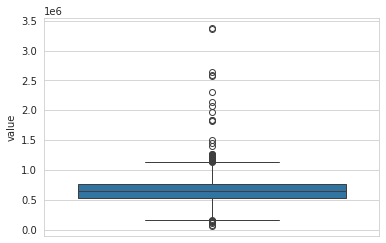

In [20]:
# Boxplot
sns.boxplot(dados.value)

In [21]:
# Exibindo a quantidade de valores acima da média:

# Cálculo da média
media = dados['value'].mean()

# Contagem de valores acima da média
total_acima_media = (dados['value'] > media).sum()

print("Total de valores acima da média:", total_acima_media)

# Quantidade de imóveis com valor abaixo de de 250 mil
abaixo_250_mil = (dados['value'] < 250000).sum()
print(f"Quantidade de imóveis com valor abaixo de 250 mil: {abaixo_250_mil}")

# Quantidade de imóveis com valor acima de 1.4 milhões
acima_1_4_milhoes = (dados['value'] > 1400000).sum()
print(f"Quantidade de imóveis com valor acima de 1.4 milhões: {acima_1_4_milhoes}")

# Quantidade de imóveis com valor acima de 1.75 milhões
acima_1_75_milhoes = (dados['value'] > 1750000).sum()
print(f"Quantidade de imóveis com valor acima de 1.75 milhões: {acima_1_75_milhoes}")

# Quantidade de imóveis com valor acima de 2 milhões
acima_2_milhoes = (dados['value'] > 2000000).sum()
print(f"Quantidade de imóveis com valor acima de 2 milhões: {acima_2_milhoes}")

# Quantidade de imóveis com valor acima de 2.5 milhões
acima_2_5_milhoes = (dados['value'] > 2500000).sum()
print(f"Quantidade de imóveis com valor acima de 2.5 milhões: {acima_2_5_milhoes}")

# Quantidade de imóveis com valor acima de 3 milhões
acima_3_milhoes = (dados['value'] > 3000000).sum()
print(f"Quantidade de imóveis com valor acima de 3 milhões: {acima_3_milhoes}")


print("Total de valores na variável:", len(dados['value']))

Total de valores acima da média: 4709
Quantidade de imóveis com valor abaixo de 250 mil: 87
Quantidade de imóveis com valor acima de 1.4 milhões: 15
Quantidade de imóveis com valor acima de 1.75 milhões: 12
Quantidade de imóveis com valor acima de 2 milhões: 8
Quantidade de imóveis com valor acima de 2.5 milhões: 5
Quantidade de imóveis com valor acima de 3 milhões: 2
Total de valores na variável: 9510


#### Removendo Valores Acima de 2 milhões

In [22]:
# Removendo imóveis com valor abaixo de 250 mil
dados = dados[dados['value'] >= 250000]

# Removendo imóveis com valor acima de 1.4 milhões
dados = dados[dados['value'] <= 1400000]

# Verificando o resultado
print(dados['value'].describe())

count    9.408000e+03
mean     6.569848e+05
std      1.735392e+05
min      2.523682e+05
25%      5.330157e+05
50%      6.549217e+05
75%      7.744031e+05
max      1.276326e+06
Name: value, dtype: float64


<Axes: ylabel='value'>

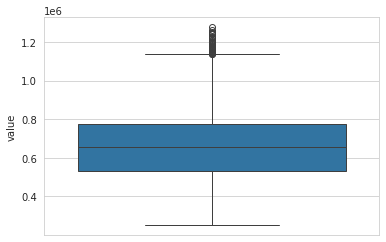

In [23]:
# Boxplot
sns.boxplot(dados.value)

### Conclusão
- O objetivo do tratamento de outliers foi reduzir o impacto de valores extremos na variável "value" para melhorar a qualidade do modelo de regressão e garantir que os resultados sejam representativos da maioria dos imóveis no conjunto de dados.

<br>

- **Remoção de Valores Abaixo de 250 Mil**: Imóveis com valores abaixo de 250 mil representavam apenas **87 casos**, o que é uma pequena fração do total. Esses imóveis podem ser considerados atípicos e poderiam distorcer as análises, influenciando negativamente as estatísticas e a precisão do modelo.
- **Remoção de Valores Acima de 1.4 Milhões**: Imóveis com valores acima de 1.4 milhões representavam apenas **15 casos**. Esses valores são consideravelmente mais altos do que a média e o desvio padrão, indicando que são outliers. A remoção desses imóveis ajuda a evitar que esses valores extremos afetem desproporcionalmente os resultados da modelagem.

<br>

## Verificando Correlação

In [24]:
# Verificando Correlação (tabela)
dados.corr()

,area,bedrooms,bathrooms,floors,year_built,location,garage,value
area,1.000000,-0.015345,-0.007077,-0.015706,-0.011728,0.010285,0.001241,0.823034
bedrooms,-0.015345,1.000000,0.020576,-0.016490,0.011355,-0.004973,-0.014242,0.392146
bathrooms,-0.007077,0.020576,1.000000,-0.015821,-0.003746,0.010069,-0.007227,0.144430
floors,-0.015706,-0.016490,-0.015821,1.000000,-0.004557,0.005059,0.002812,0.031967
year_built,-0.011728,0.011355,-0.003746,-0.004557,1.000000,0.004074,-0.010321,0.197656
location,0.010285,-0.004973,0.010069,0.005059,0.004074,1.000000,-0.006029,0.012395
garage,0.001241,-0.014242,-0.007227,0.002812,-0.010321,-0.006029,1.000000,0.081803
value,0.823034,0.392146,0.144430,0.031967,0.197656,0.012395,0.081803,1.000000


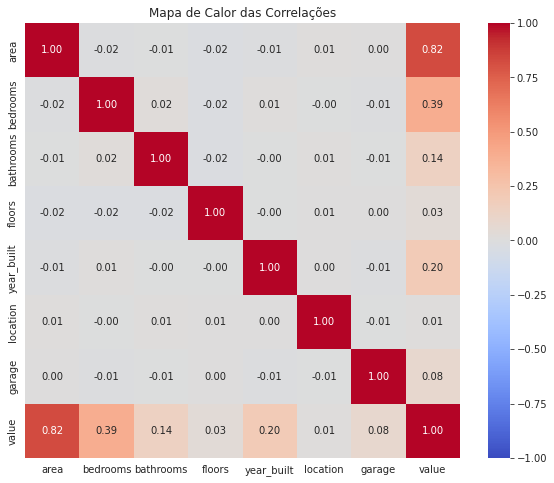

In [25]:
# Visualizando Correlações através de um Mapa de Calor

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

### Conclusão
- A **área da propriedade** é a variável que mais **influencia o valor de venda**, com uma correlação **positiva muito forte** (0.82).
- **Quartos e ano de construção** têm correlações **positivas moderadas e fracas**, respectivamente, indicando que também são fatores importantes, mas com menos impacto comparado à área.
- **Banheiros, andares, localização, e garagem** têm **correlações fracas** com o valor de venda, sugerindo que seu impacto é menor.
- **Relação entre as Variáveis Pretioras**: As variáveis preditivas apresentam **correlações muito fracas entre si**. Isso indica **baixa multicolinearidade**, o que é desejável em modelos de regressão, pois significa que cada variável está trazendo informações distintas e independentes.

<br>

### Análise 1 - Relação Entre Área e Valor do Imóvel

<Figure size 1296x864 with 0 Axes>

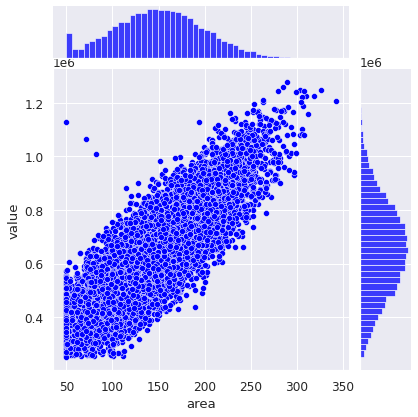

In [26]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'area', 
              y = 'value',
              color = 'blue')

In [27]:
# Correlação (tabela)
dados[['area', 'value']].corr()

,area,value
area,1.000000,0.823034
value,0.823034,1.000000


<br>

### Análise 2 - Relação Entre Quantidade de Quartos e Valor do Imóvel

<Figure size 1296x864 with 0 Axes>

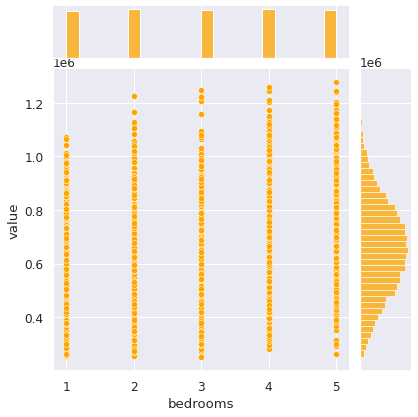

In [28]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'bedrooms', 
              y = 'value',
              color = 'orange')

In [29]:
# Correlação (tabela)
dados[['bedrooms', 'value']].corr()

,bedrooms,value
bedrooms,1.000000,0.392146
value,0.392146,1.000000


<br><br>

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

<br>

<br>

## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

In [30]:
# Cria um objeto separado para a variável alvo
y = dados.value

# Cria um objeto separado para as variáveis de entrada
X = dados.drop('value', axis=1)

# Split em dados de treino e teste sem amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=1234)

# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(7526, 7) (1882, 7) (7526,) (1882,)


<br>

## Padronização

- Não é necessário aplicar padronização/normalização na variável alvo.

In [31]:
# Inicializa o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# Converte os arrays de volta para DataFrame
X_treino_scaled = pd.DataFrame(X_treino_scaled, columns=X_treino.columns, index=X_treino.index)
X_teste_scaled = pd.DataFrame(X_teste_scaled, columns=X_teste.columns, index=X_teste.index)

X_treino = X_treino_scaled
X_teste = X_teste_scaled

In [32]:
# Verifica os DataFrames escalonados
print(X_treino.head())
print(X_teste.head())

          area  bedrooms  bathrooms    floors  year_built  location    garage
8367  0.372831 -1.427639   1.212215  0.995492    0.643081  1.393791  0.454270
6181 -0.338076  0.707719  -1.215441 -1.004528    0.558135 -0.013463  0.454270
2257 -0.457169  1.419505  -1.215441  0.995492   -0.546163 -0.013463 -0.437445
3885  0.531222 -1.427639  -0.001613 -1.004528    1.209387 -0.717090 -0.437445
3762 -0.862266 -0.004067   1.212215  0.995492   -0.404586 -0.013463  0.454270
          area  bedrooms  bathrooms    floors  year_built  location    garage
6909 -0.942360  0.707719  -1.215441  0.995492   -1.593830 -0.717090 -0.437445
832  -1.059650 -0.004067  -1.215441 -1.004528    1.662433 -0.013463 -1.329159
357  -0.320740  0.707719   1.212215 -1.004528    0.671396 -1.420717  1.345984
9128  0.566537 -0.004067  -0.001613  0.995492   -0.064802  1.393791  0.454270
6102 -1.193164  0.707719  -0.001613  0.995492    0.331612  0.690164  1.345984


<br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>
### Nesta etapa do projeto, desenvolveremos e avaliaremos <u>três diferentes</u> modelos de machine learning para identificar qual deles apresenta o <u>melhor desempenho</u> para o nosso conjunto de dados.

<br>

Abaixo estão os modelos que serão implementados e testados:

<br>


- **Modelo 1**: **Regressão Linear (Benchmark)** - Utilizado como linha de base devido à sua simplicidade e eficácia em problemas de regressão. Este modelo ajudará a estabelecer uma base para a performance que esperamos superar com técnicas mais complexas.

<br>

- **Modelo 2**: **Regressão Ridge** - Um modelo de regressão que adiciona uma penalização L2 ao cálculo dos coeficientes, ajudando a reduzir o sobreajuste (overfitting) e melhorando a capacidade de generalização do modelo.

<br>

- **Modelo 3**: **Regressão LASSO** - Um modelo de regressão que aplica uma penalização L1, forçando a soma dos valores absolutos dos coeficientes a serem menores que um valor fixo. Isso pode resultar na eliminação de algumas variáveis irrelevantes, tornando o modelo mais interpretável e eficiente.

<br>

- **Modelo 4**: **Regressão ElasticNet** - Uma combinação de penalizações L1 e L2, este modelo busca combinar os benefícios de ambos os métodos Ridge e LASSO, ajustando a penalização para otimizar a performance e a interpretabilidade do modelo.

<br>

- **Modelo 5**: **Regressão com Árvores de Decisão** - Utiliza uma estrutura de árvore para modelar as relações entre variáveis preditoras e a variável alvo, podendo capturar relações não lineares e interações entre variáveis de forma eficaz.

<br>

- **Modelo 6**: **Regressão com Random Forest** - Uma extensão do modelo de árvores de decisão, que utiliza um conjunto de árvores (floresta) para melhorar a robustez e a capacidade de generalização do modelo, reduzindo o risco de overfitting.

<br>

- **Modelo 7:** **SVR (Support Vector Regressor)** - Utiliza técnicas de aprendizado de máquina baseadas em margens para regressão, adequado para capturar relações complexas e não lineares.

<br>

- **Modelo 8**: **K-Nearest Neighbors Regressor (KNN)** - Usa a média dos k vizinhos mais próximos para prever o valor da variável alvo.

<br>

- **Modelo 9**: **Gradient Boosting Regressor** - Utiliza boosting para melhorar a precisão das previsões ao combinar vários modelos fracos.

<br>

- **Modelo 10**: **XGBoost Regressor** - Uma implementação eficiente de gradient boosting, amplamente utilizada em competições de machine learning.


<br><br>


Cada modelo será treinado utilizando o mesmo conjunto de dados, permitindo uma comparação justa de sua eficácia. A avaliação de cada modelo incluirá métricas como **erro médio absoluto (MAE)**, **erro quadrático médio (MSE)** e o **coeficiente de determinação (R²)**, entre outras, dependendo das especificidades de nosso problema e dados.

<br><br><br>

## Criando Dataframe para salvar métricas de cada Modelo

In [33]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 1 com Regressão Logística (Benchmark)</span>

- Utilizado como linha de base devido à sua simplicidade e eficácia em problemas de regressão. Este modelo ajudará a estabelecer uma base para a performance que esperamos superar com técnicas mais complexas.

### Criação e Treinamento do Modelo

In [34]:
# Cria o modelo
modelo_v1_RL = LinearRegression()

# Treina o modelo
modelo_v1_RL.fit(X_treino, y_treino)

LinearRegression()

#### Visualizando coeficientes das variáveis preditoras

              Coeficiente
area        143817.730025
bedrooms     69954.060360
year_built   35755.182681
bathrooms    24812.997807
garage       15188.803916
floors        9422.885410
location      1130.528587


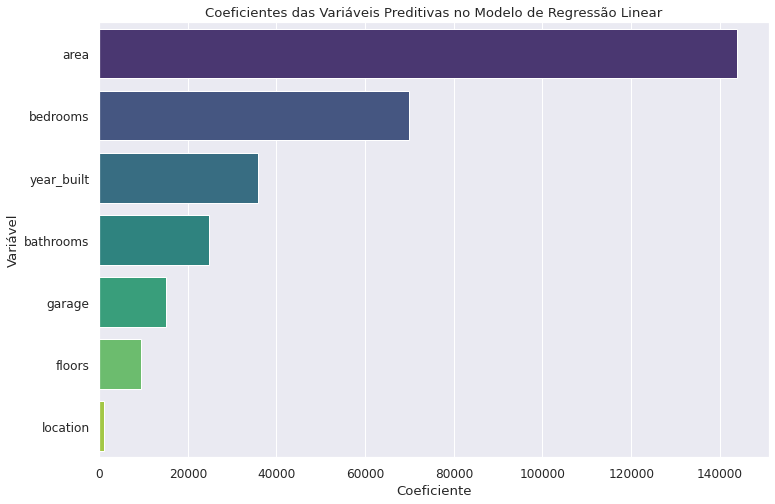

In [35]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1_RL.coef_, X.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1_RL.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Linear')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

### Interpretação dos Coeficientes das Variáveis Preditivas

<table>
  <tr>
    <th>Variável</th>
    <th>Interpretação</th>
  </tr>
  <tr>
    <td>area</td>
    <td>Cada aumento de 1 metro quadrado na área da propriedade aumenta o valor do imóvel em média em <b>143,817.73 unidades monetárias</b>.</td>
  </tr>
  <tr>
    <td>bedrooms</td>
    <td>Cada quarto adicional aumenta o valor do imóvel em média em <b>69,954.06 unidades monetárias</b>.</td>
  </tr>
  <tr>
    <td>bathrooms</td>
    <td>Cada banheiro adicional aumenta o valor do imóvel em média em <b>24,812.99 unidades monetárias</b>.</td>
  </tr>
  <tr>
    <td>floors</td>
    <td>Cada andar adicional aumenta o valor do imóvel em média em <b>9,422.89 unidades monetárias</b>.</td>
  </tr>
  <tr>
    <td>year_built</td>
    <td>Cada ano mais recente de construção aumenta o valor do imóvel em média em <b>35,755.18 unidades monetárias</b>.</td>
  </tr>
  <tr>
    <td>location</td>
    <td>Cada mudança na localização, conforme codificação, aumenta o valor do imóvel em média em <b>1,130.53 unidades monetárias</b>.</td>
  </tr>
  <tr>
    <td>garage</td>
    <td>Cada vaga adicional na garagem aumenta o valor do imóvel em média em <b>15,188.80 unidades monetárias</b>.</td>
  </tr>
</table>

> Os **coeficientes** indicam que a **área** e o **número de quartos** são os fatores que mais **influenciam o valor do imóvel**, seguidos pelo ano de construção, número de banheiros e vagas na garagem. A localização tem um impacto menor comparativamente. Cada aumento nessas variáveis preditivas resulta em um aumento correspondente no valor do imóvel.

<br>

## Previsões

In [36]:
# Previsões com dados de teste
pred_v1 = modelo_v1_RL.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v1[:10])

[484807.71796818 502980.62114346 722885.33338224 752741.31284537
 576379.96836352 538682.52513276 465037.60373991 857842.03090589
 601634.80926739 560714.87285153]


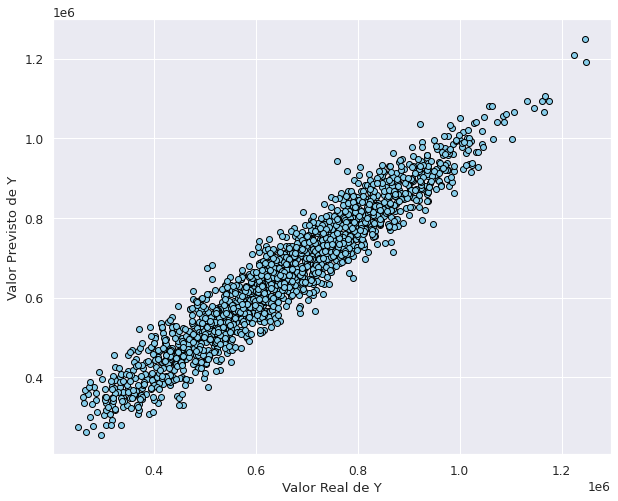

In [37]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v1, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

> A partir do **gráfico de dispersão**, podemos ver que há uma correlação muito forte entre os valores previstos (eixo Y) e os valores reais (eixo X) nos dados de teste. Os pontos estão próximos da linha y = x, indicando que as previsões do modelo estão bem alinhadas com os valores reais. Isso sugere que nosso modelo de Regressão Linear está funcionando bem e tem um bom desempenho em prever o valor dos imóveis com base nas características fornecidas.

<br>

## Avaliação do Modelo

In [38]:
dados.columns

Index(['area', 'bedrooms', 'bathrooms', 'floors', 'year_built', 'location',
       'garage', 'value'],
      dtype='object')

In [39]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v1)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v1)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v1)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v1)
print('Variância Explicada:', evs)


Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 40150.23543029333
MSE - Erro Quadrático Médio: 2513890239.5172915
RMSE - Raiz Quadrada do Erro Quadrático Médio: 50138.70999055811
O valor é 50138.71 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.9164448313427688
Variância Explicada: 0.916446793193382


#### Análise de Resíduos

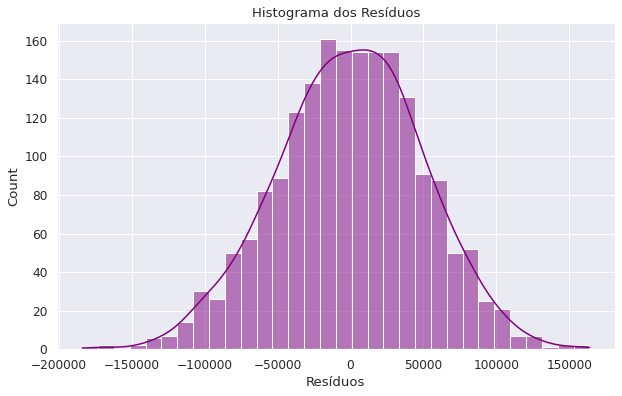

In [40]:
# Plot dos resíduos
residuos = y_teste - pred_v1

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

> O **histograma dos resíduos** mostra uma **distribuição aproximadamente normal**, centrada em zero, indicando que o modelo de regressão linear **não está enviesado** e que os erros são distribuídos aleatoriamente.

<br>

<br>

### Salvando as Métricas

In [41]:
# Salvando as métricas no dataframe com formatação
modelo_v1 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 1 RL'],
    'Nome do Algoritmo': ['Regressão Linear'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v1], ignore_index=True)

In [42]:
# Visualizando Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 2 com Regressão Ridge</span>

- Um modelo de regressão que adiciona uma penalização L2 ao cálculo dos coeficientes, ajudando a reduzir o sobreajuste (overfitting) e melhorando a capacidade de generalização do modelo.

## Versão 1

- Modelo sem ajuste de hiperparâmetros.


### Criação e Treinamento do Modelo

In [43]:
# Cria o modelo
modelo_v2_RR = Ridge(alpha = 1.0)

# Treinamento
modelo_v2_RR.fit(X_treino, y_treino)

Ridge()

#### Visualizando coeficientes das variáveis preditoras

              Coeficiente
area        143798.424526
bedrooms     69944.690970
year_built   35750.267911
bathrooms    24809.913948
garage       15186.487729
floors        9421.201753
location      1130.703490


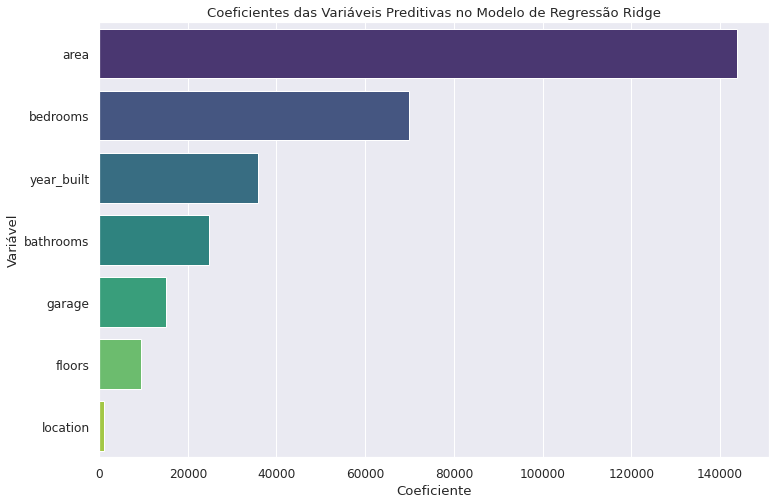

In [44]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2_RR.coef_, X.columns, columns = ['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2_RR.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Ridge')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [45]:
# Previsões com dados de teste
pred_v2 = modelo_v2_RR.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v2[:10])

[484830.07306998 503001.46160945 722876.18172082 752728.25267653
 576390.0743622  538698.61323952 465063.27764741 857815.48071211
 601641.43614486 560726.01830058]


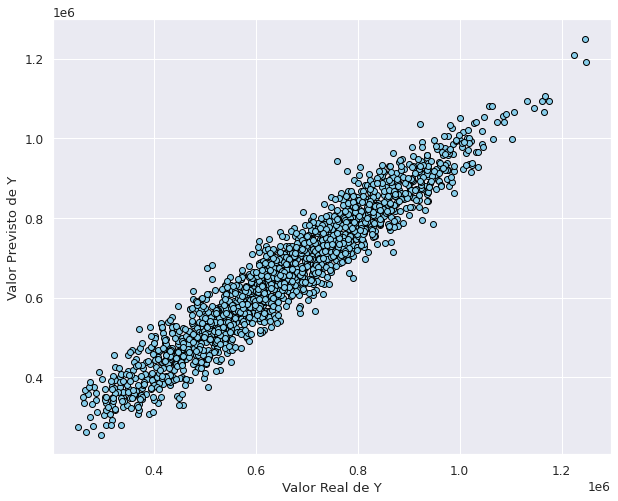

In [46]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [47]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v2)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v2)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v2)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v2)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 40150.66765021586
MSE - Erro Quadrático Médio: 2513938475.068022
RMSE - Raiz Quadrada do Erro Quadrático Médio: 50139.19100930949
O valor é 50139.19 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.9164432281186052
Variância Explicada: 0.9164451783753512


#### Análise de Resíduos

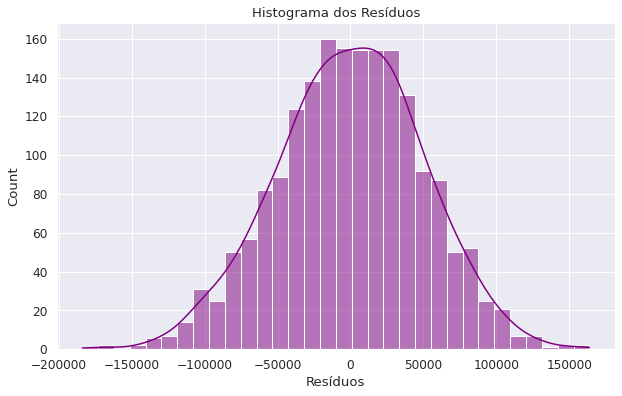

In [48]:
# Plot dos resíduos
residuos = y_teste - pred_v2

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [49]:
# Salvando as métricas no dataframe com formatação
modelo_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 2 RR V1'],
    'Nome do Algoritmo': ['Regressão Ridge'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v2], ignore_index=True)

In [50]:
# Visualizando Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445


<br><br>

## Versão 2

- Modelo com ajuste dos hiperparâmetros.


### Criação e Treinamento do Modelo

In [51]:
# Definindo o modelo
modelo_v2_RR = Ridge()

# Definindo os parâmetros para a busca em grade
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Realizando a busca em grade
grid_search_v2 = GridSearchCV(estimator=modelo_v2_RR, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_v2.fit(X_treino, y_treino)

# Melhor combinação de hiperparâmetros
melhor_param_v2 = grid_search_v2.best_params_
print(f"Melhor combinação de hiperparâmetros para Regressão Ridge: {melhor_param_v2}")

# Recriando o modelo com a melhor combinação de hiperparâmetros
modelo_v2_RR = Ridge(**melhor_param_v2)
modelo_v2_RR.fit(X_treino, y_treino)

Melhor combinação de hiperparâmetros para Regressão Ridge: {'alpha': 0.01}


Ridge(alpha=0.01)

In [52]:
# Previsões com dados de teste
pred_v2 = modelo_v2_RR.predict(X_teste)

# Avaliação do Modelo

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v2)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v2)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v2)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v2)
print('Variância Explicada:', evs)

MAE - Erro Médio Absoluto: 40150.23975309658
MSE - Erro Quadrático Médio: 2513890717.0610437
RMSE - Raiz Quadrada do Erro Quadrático Médio: 50138.714752784035
O valor é 50138.71 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.9164448154704574
Variância Explicada: 0.916446777204945


<br>

### Salvando as Métricas

In [53]:
# Salvando as métricas no dataframe com formatação
modelo_v2 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 2 RR V2'],
    'Nome do Algoritmo': ['Regressão Ridge'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v2], ignore_index=True)

In [54]:
# Visualizando Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 3 com Regressão Lasso</span>
- Um modelo de regressão que aplica uma penalização L1, forçando a soma dos valores absolutos dos coeficientes a serem menores que um valor fixo. Isso pode resultar na eliminação de algumas variáveis irrelevantes, tornando o modelo mais interpretável e eficiente.

### Criação e Treinamento do Modelo

In [55]:
# Cria o modelo
modelo_v3_LA = Lasso(alpha = 1.0)

# Treinamento
modelo_v3_LA.fit(X_treino, y_treino)

Lasso()

#### Visualizando coeficientes das variáveis preditoras

              Coeficiente
area        143816.702049
bedrooms     69953.066505
year_built   35754.174255
bathrooms    24811.998532
garage       15187.767021
floors        9421.854687
location      1129.550278


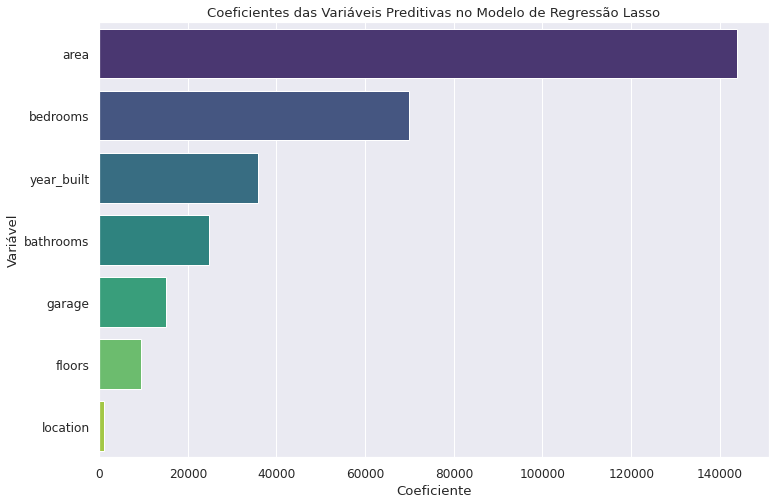

In [56]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v3_LA.coef_, X.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v3_LA.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de Regressão Lasso')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [57]:
# Previsões com dados de teste
pred_v3 = modelo_v3_LA.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v2[:10])

[484807.9415481  502980.82957622 722885.24185321 752741.18222622
 576380.06943619 538682.68603565 465037.8605132  857841.76536933
 601634.8755441  560714.98431871]


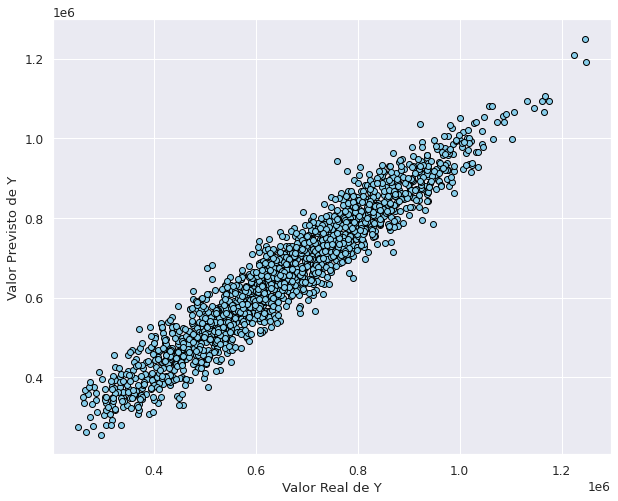

In [58]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v3, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [59]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v3)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v3)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v3)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v3)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 40150.25165300774
MSE - Erro Quadrático Médio: 2513890572.808381
RMSE - Raiz Quadrada do Erro Quadrático Médio: 50138.713314248314
O valor é 50138.71 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.9164448202650405
Variância Explicada: 0.9164467807436338


#### Análise de Resíduos

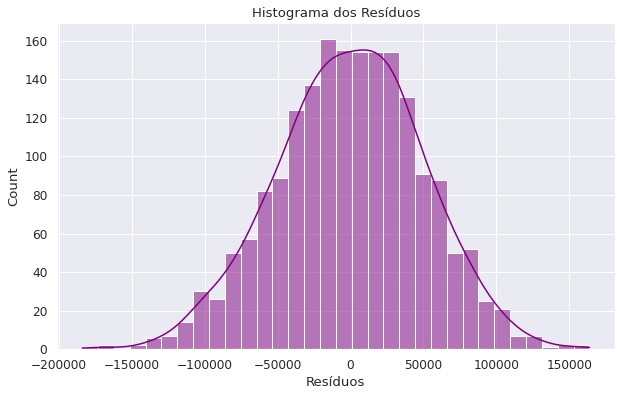

In [60]:
# Plot dos resíduos
residuos = y_teste - pred_v3

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [61]:
# Salvando as métricas no dataframe com formatação
modelo_v3 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 3 RL'],
    'Nome do Algoritmo': ['Regressão Lasso'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v3], ignore_index=True)

In [62]:
# Visualizando Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447


<br><br>

## Versão 2

- Modelo com ajuste dos hiperparâmetros.


### Criação e Treinamento do Modelo

In [63]:
# Definindo o modelo
modelo_v3_LA = Lasso()

# Definindo os parâmetros para a busca em grade
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Realizando a busca em grade
grid_search_v3 = GridSearchCV(estimator=modelo_v3_LA, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_v3.fit(X_treino, y_treino)

# Melhor combinação de hiperparâmetros
melhor_param_v3 = grid_search_v3.best_params_
print(f"Melhor combinação de hiperparâmetros para Regressão Lasso: {melhor_param_v3}")

# Recriando o modelo com a melhor combinação de hiperparâmetros
modelo_v3_LA = Lasso(**melhor_param_v3)
modelo_v3_LA.fit(X_treino, y_treino)

Melhor combinação de hiperparâmetros para Regressão Lasso: {'alpha': 1}


Lasso(alpha=1)

> Não foi necessário recriar modelo da versão 2, pois o melhor valor de alpha já foi colocado na versão 1

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 4 com ElasticNet</span>

- Combina as penalizações L1 e L2, buscando os benefícios de ambos Ridge e Lasso.

### Criação e Treinamento do Modelo

In [64]:
# Cria o modelo
modelo_v4_EN = ElasticNet(alpha=1.0)

# Treinamento
modelo_v4_EN.fit(X_treino, y_treino)

ElasticNet()

#### Visualizando coeficientes das variáveis preditoras

             Coeficiente
area        95555.132396
bedrooms    46517.821851
year_built  23563.622651
bathrooms   16901.587465
garage       9624.270049
floors       5560.563994
location     1294.962105


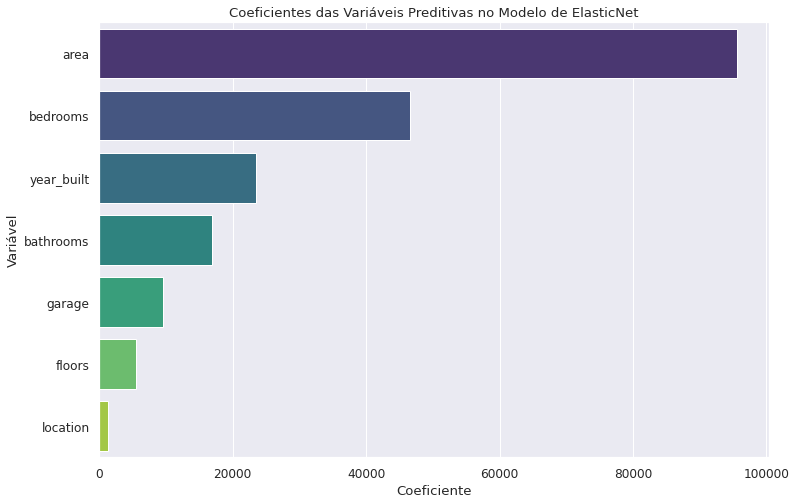

In [65]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v4_EN.coef_, X.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)
print(df_coef)

# Visualização Gráfica dos coeficientes das variáveis preditoras

# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v4_EN.coef_, X.columns, columns=['Coeficiente'])

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando os coeficientes de forma decrescente
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de ElasticNet')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [66]:
# Previsões com dados de teste
pred_v4 = modelo_v4_EN.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v4[:10])

[541220.65065957 554839.36623446 700159.54453016 720153.37336545
 602127.57745069 578630.36449914 529182.3563414  791024.81929634
 618759.8361123  589934.72735084]


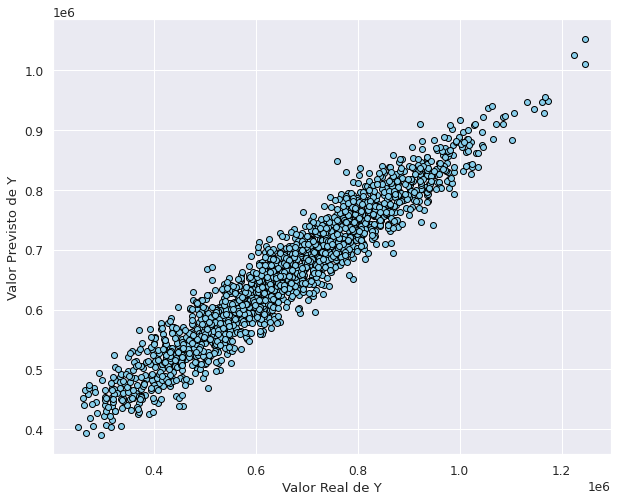

In [67]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v4, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [68]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v4)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v4)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v4)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v4)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 60456.773677737125
MSE - Erro Quadrático Médio: 5706792373.806983
RMSE - Raiz Quadrada do Erro Quadrático Médio: 75543.31455401584
O valor é 75543.31 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.810321074568155
Variância Explicada: 0.8103964628909608


#### Análise de Resíduos

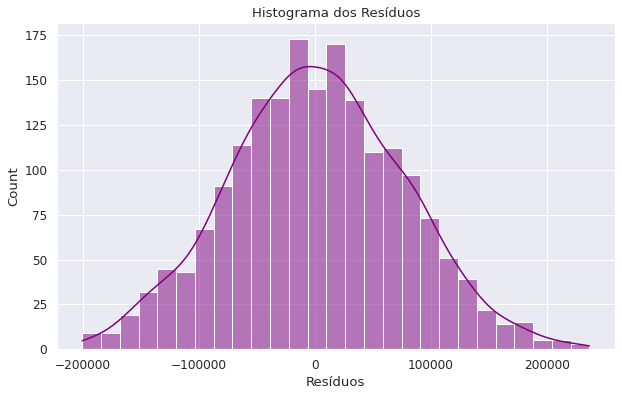

In [69]:
# Plot dos resíduos
residuos = y_teste - pred_v4

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [70]:
# Salvando as métricas no dataframe com formatação
modelo_v4 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 4 EN'],
    'Nome do Algoritmo': ['ElasticNet'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v4], ignore_index=True)

In [71]:
# Visualizando o Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 5 com Árvore de Decisão</span>

- Captura relações não lineares entre as variáveis preditoras e a variável alvo.

### Criação e Treinamento do Modelo

In [72]:
# Cria o modelo
modelo_v5_DT = DecisionTreeRegressor(random_state=1234)

# Treinamento
modelo_v5_DT.fit(X_treino, y_treino)

DecisionTreeRegressor(random_state=1234)

#### Visualizando coeficientes das variáveis preditoras

            Importância
area           0.706216
bedrooms       0.165870
year_built     0.073158
bathrooms      0.022846
garage         0.013535
location       0.010619
floors         0.007756


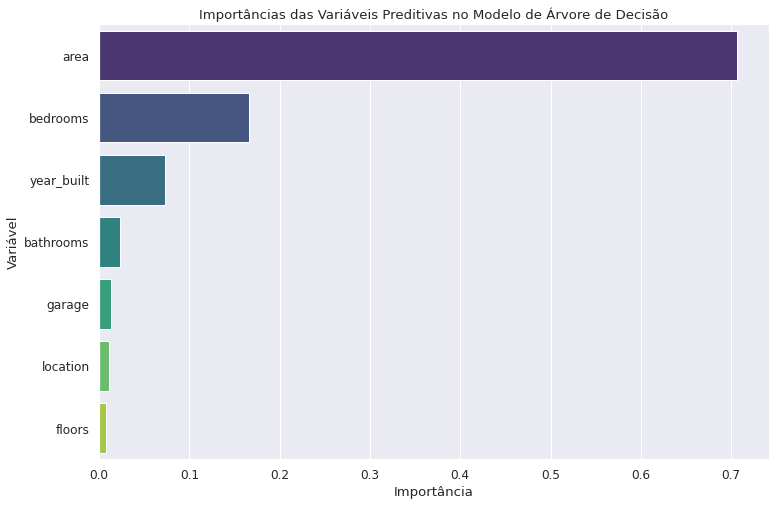

In [73]:
# Visualizando importâncias das variáveis preditoras para o modelo de Árvore de Decisão

# Importância das variáveis preditoras
df_importance = pd.DataFrame(modelo_v5_DT.feature_importances_, X.columns, columns=['Importância'])
df_importance = df_importance.sort_values(by='Importância', ascending=False)
print(df_importance)

# Visualização Gráfica das importâncias das variáveis preditoras
# Resetando o índice para criar uma coluna de variáveis
df_importance.reset_index(inplace=True)
df_importance.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando as importâncias de forma decrescente
df_importance = df_importance.sort_values(by='Importância', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance, palette='viridis')
plt.title('Importâncias das Variáveis Preditivas no Modelo de Árvore de Decisão')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [74]:
# Previsões com dados de teste
pred_v5 = modelo_v5_DT.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v5[:10])

[493840.24863758 483005.5837746  734810.67676336 717237.96424645
 622295.20134803 609922.16679563 431529.5341899  849916.56840831
 647257.9938525  580630.88962155]


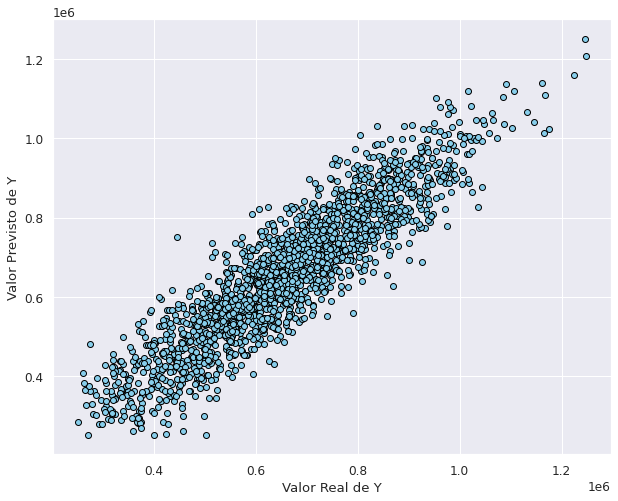

In [75]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v5, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [76]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v5)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v5)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v5)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v5)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 59601.84585394759
MSE - Erro Quadrático Médio: 5588245812.4780445
RMSE - Raiz Quadrada do Erro Quadrático Médio: 74754.5705122974
O valor é 74754.57 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.8142612537254902
Variância Explicada: 0.8142622328161329


#### Análise de Resíduos

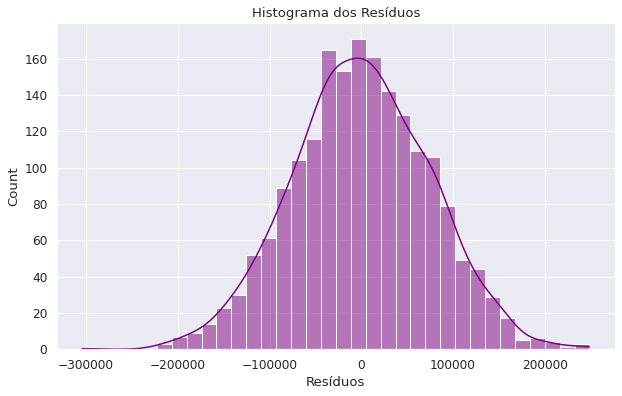

In [77]:
# Plot dos resíduos
residuos = y_teste - pred_v5

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [78]:
# Salvando as métricas no dataframe com formatação
modelo_v5 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 5 DT'],
    'Nome do Algoritmo': ['Árvore de Decisão'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v5], ignore_index=True)

In [79]:
# Visualizando o Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
5,Modelo 5 DT,Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 6 com Random Forest</span>

- Usa uma combinação de várias árvores de decisão para melhorar a robustez e a precisão das previsões.

### Criação e Treinamento do Modelo

In [80]:
# Cria o modelo
modelo_v6_RF = RandomForestRegressor(n_estimators=100, random_state=1234)

# Treinamento
modelo_v6_RF.fit(X_treino, y_treino)

RandomForestRegressor(random_state=1234)

#### Visualizando coeficientes das variáveis preditoras

            Importância
area           0.714334
bedrooms       0.163018
year_built     0.069685
bathrooms      0.021214
garage         0.014174
location       0.011420
floors         0.006155


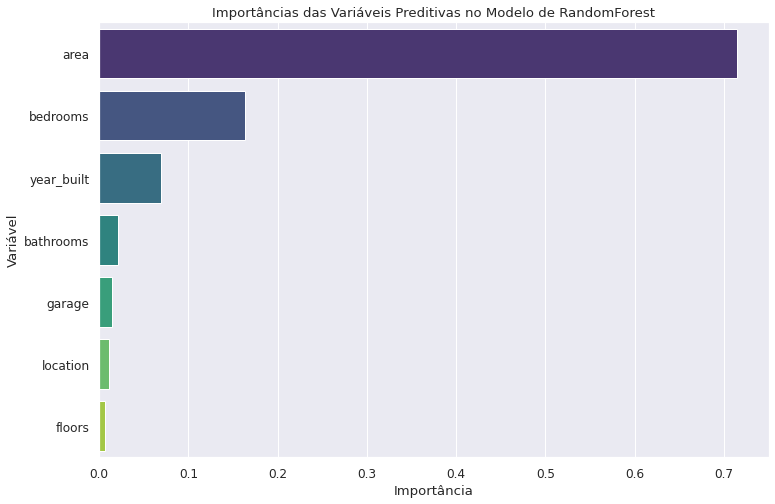

In [81]:
# Visualizando importâncias das variáveis preditoras para o modelo de Random Forest

# Importância das variáveis preditoras
df_importance = pd.DataFrame(modelo_v6_RF.feature_importances_, X.columns, columns=['Importância'])
df_importance = df_importance.sort_values(by='Importância', ascending=False)
print(df_importance)

# Visualização Gráfica das importâncias das variáveis preditoras
# Resetando o índice para criar uma coluna de variáveis
df_importance.reset_index(inplace=True)
df_importance.rename(columns={'index': 'Variável'}, inplace=True)

# Ordenando as importâncias de forma decrescente
df_importance = df_importance.sort_values(by='Importância', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance, palette='viridis')
plt.title('Importâncias das Variáveis Preditivas no Modelo de RandomForest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [82]:
# Previsões com dados de teste
pred_v6 = modelo_v6_RF.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v6[:10])

[486442.27504899 517413.57961163 722085.53021908 740969.585588
 528485.0818009  535561.85276018 430957.90701167 828654.97332074
 611160.57852142 533586.1713919 ]


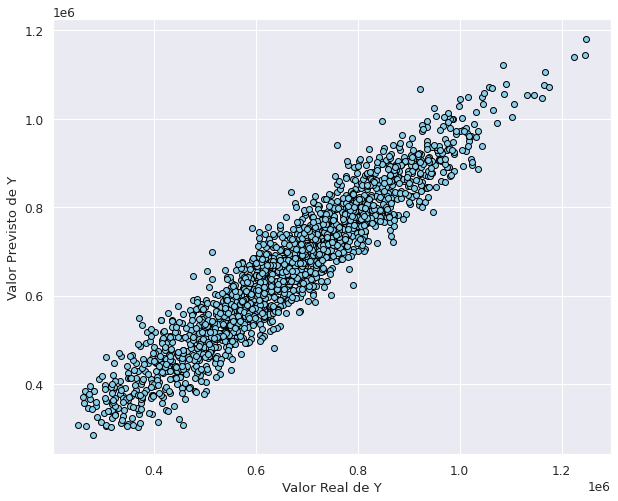

In [83]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v6, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [84]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v6)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v6)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v6)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v6)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 44033.679819654724
MSE - Erro Quadrático Médio: 3020908256.5601845
RMSE - Raiz Quadrada do Erro Quadrático Médio: 54962.789745064656
O valor é 54962.79 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.8995928720724992
Variância Explicada: 0.8996159393924663


#### Análise de Resíduos

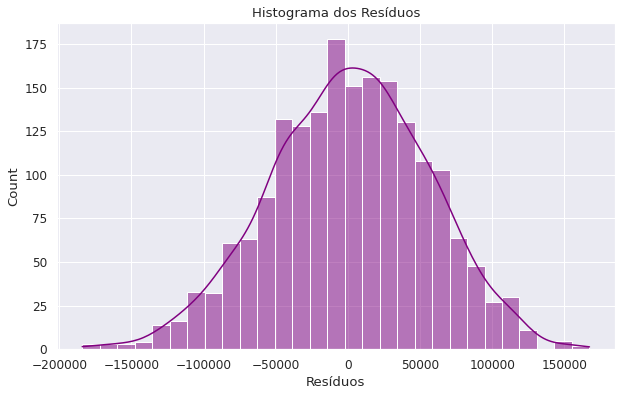

In [85]:
# Plot dos resíduos
residuos = y_teste - pred_v6

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [86]:
# Salvando as métricas no dataframe com formatação
modelo_v6 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 6 RF'],
    'Nome do Algoritmo': ['Random Forest'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v6], ignore_index=True)

In [87]:
# Visualizando o Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
5,Modelo 5 DT,Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262
6,Modelo 6 RF,Random Forest,44033.68,3020908256.56,54962.789745,0.899593,0.899616


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 7 com SVR (Support Vector Regressor)</span>

- Utiliza técnicas de aprendizado de máquina baseadas em margens para regressão, adequado para capturar relações complexas e não lineares..

### Criação e Treinamento do Modelo

In [88]:
# Cria o modelo
modelo_v7_SVR = SVR(kernel='linear', C=100)

# Treinamento
modelo_v7_SVR.fit(X_treino, y_treino)

SVR(C=100, kernel='linear')

#### Visualizando coeficientes das variáveis preditoras

     Variável    Coeficiente
0        area  132750.057698
1    bedrooms   64767.960127
2  year_built   32545.816760
3   bathrooms   22697.825274
4      garage   13766.357540
5      floors    8065.859997
6    location    1769.974382


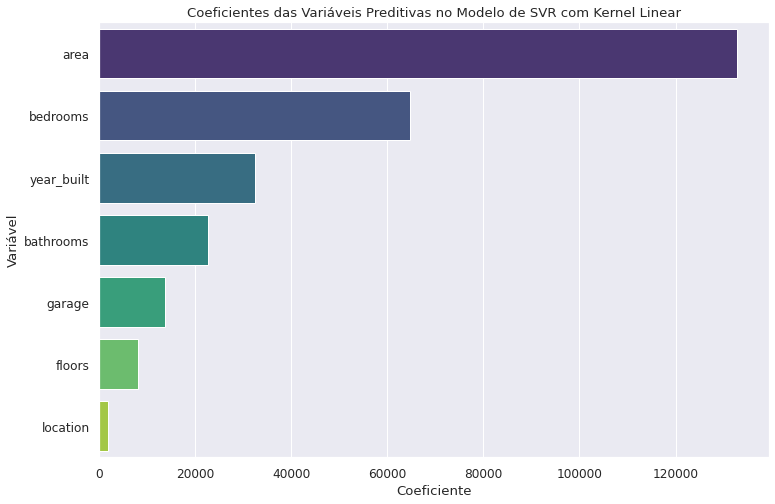

In [89]:
# Visualizando coeficientes das variáveis preditoras para o modelo SVR com kernel linear
df_coef = pd.DataFrame(modelo_v7_SVR.coef_.flatten(), X.columns, columns=['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Resetando o índice para criar uma coluna de variáveis
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Variável'}, inplace=True)
print(df_coef)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=df_coef, palette='viridis')
plt.title('Coeficientes das Variáveis Preditivas no Modelo de SVR com Kernel Linear')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [90]:
# Previsões com dados de teste
pred_v7 = modelo_v7_SVR.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v7[:10])

[498219.70673797 515364.02511032 716739.9058618  745751.43749593
 582183.9023757  549397.21899952 479794.64733352 843036.57154115
 605027.39670137 565902.55384458]


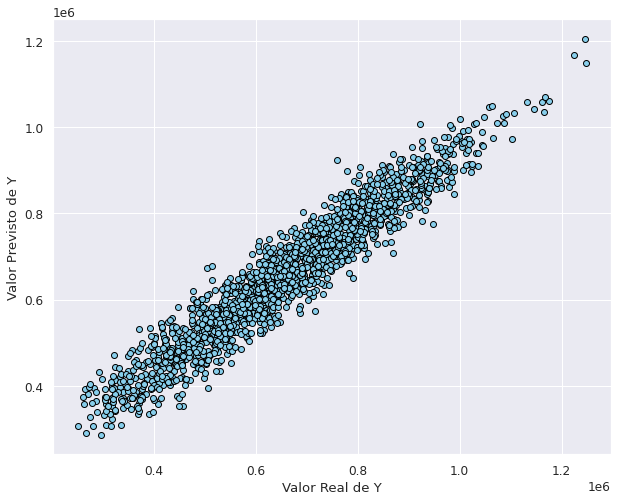

In [91]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v7, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [92]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v7)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v7)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v7)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v7)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 41679.8580444779
MSE - Erro Quadrático Médio: 2709461576.202277
RMSE - Raiz Quadrada do Erro Quadrático Médio: 52052.488664830205
O valor é 52052.49 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.9099445491250489
Variância Explicada: 0.9099446668331688


#### Análise de Resíduos

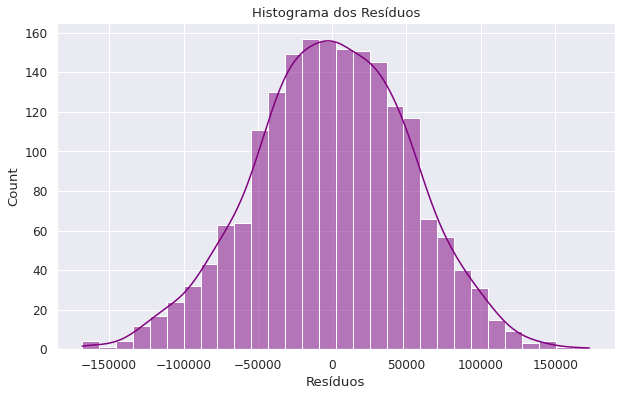

In [93]:
# Plot dos resíduos
residuos = y_teste - pred_v7

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [94]:
# Salvando as métricas no dataframe com formatação
modelo_v7 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 7 SVR'],
    'Nome do Algoritmo': ['SVR'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v7], ignore_index=True)

In [95]:
# Visualizando o Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
5,Modelo 5 DT,Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262
6,Modelo 6 RF,Random Forest,44033.68,3020908256.56,54962.789745,0.899593,0.899616
7,Modelo 7 SVR,SVR,41679.86,2709461576.20,52052.488665,0.909945,0.909945


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 8 com K-Nearest Neighbors Regressor (KNN)</span>

- Usa a média dos k vizinhos mais próximos para prever o valor da variável alvo.

### Criação e Treinamento do Modelo

In [96]:
# Cria o modelo
modelo_v8_KNN = KNeighborsRegressor(n_neighbors=5)

# Treinamento
modelo_v8_KNN.fit(X_treino, y_treino)

KNeighborsRegressor()

#### Visualizando coeficientes das variáveis preditoras

     Variável  Importância
0        area     1.204292
1    bedrooms     0.289468
4  year_built     0.070305
2   bathrooms     0.044795
6      garage     0.017942
3      floors     0.005393
5    location     0.002231


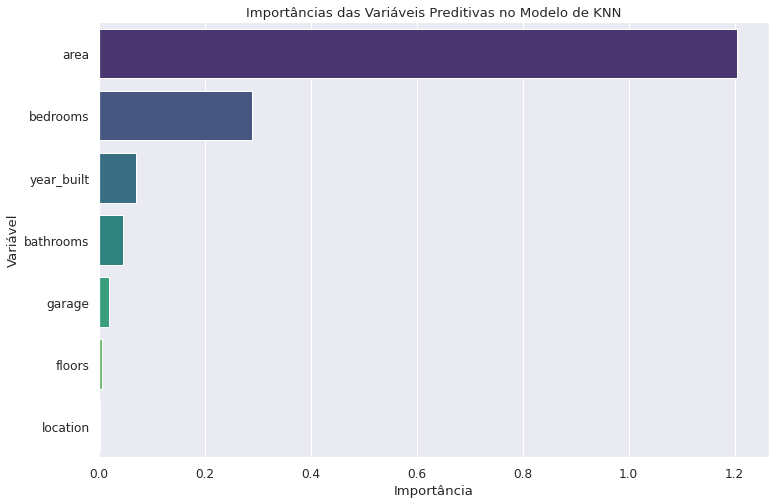

In [97]:
from sklearn.inspection import permutation_importance

# Calcular a importância das características com permutação
result = permutation_importance(modelo_v8_KNN, X_teste, y_teste, n_repeats=10, random_state=1, n_jobs=-1)

# Extraindo a importância das variáveis e seus nomes
importances = result.importances_mean
feature_names = X.columns.tolist()

# Criação do DataFrame
df_importance = pd.DataFrame({'Variável': feature_names, 'Importância': importances})

# Ordenando as importâncias de forma decrescente
df_importance = df_importance.sort_values(by='Importância', ascending=False)
print(df_importance)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance, palette='viridis')
plt.title('Importâncias das Variáveis Preditivas no Modelo de KNN')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [98]:
# Previsões com dados de teste
pred_v8 = modelo_v8_KNN.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v8[:10])

[427334.76211861 527443.26330656 702945.61454056 701638.65837421
 579687.35441375 492525.5079249  539946.73164656 813973.15966893
 575491.99500517 611696.67969312]


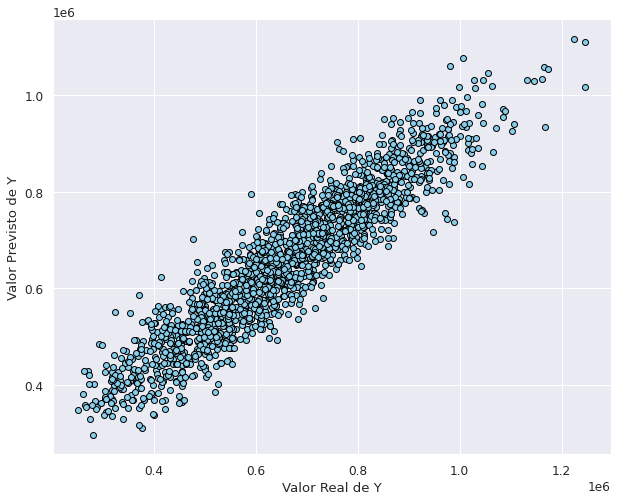

In [99]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v8, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [100]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v8)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v8)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médiopred_v8
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v8)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v8)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 52069.551160074516
MSE - Erro Quadrático Médio: 4297998634.908646
RMSE - Raiz Quadrada do Erro Quadrático Médio: 65559.12320118875
O valor é 65559.12 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.8571457117804403
Variância Explicada: 0.8573942456574829


#### Análise de Resíduos

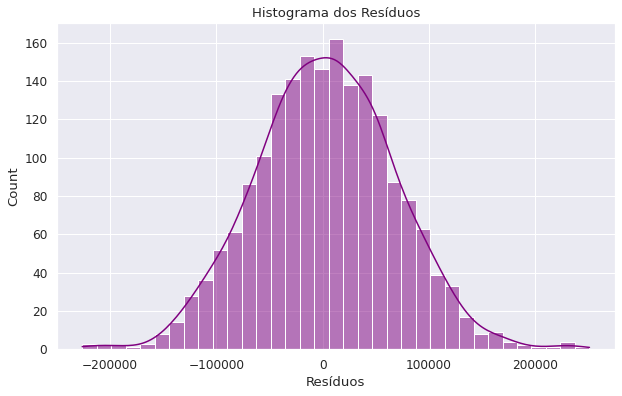

In [101]:
# Plot dos resíduos
residuos = y_teste - pred_v8

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [102]:
# Salvando as métricas no dataframe com formatação
modelo_v8 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 8 KNN'],
    'Nome do Algoritmo': ['KNN'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v8], ignore_index=True)

In [103]:
# Visualizando o Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
5,Modelo 5 DT,Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262
6,Modelo 6 RF,Random Forest,44033.68,3020908256.56,54962.789745,0.899593,0.899616
7,Modelo 7 SVR,SVR,41679.86,2709461576.20,52052.488665,0.909945,0.909945
8,Modelo 8 KNN,KNN,52069.55,4297998634.91,65559.123201,0.857146,0.857394


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 9 com Modelo 9: Gradient Boosting Regressor</span>

- Utiliza boosting para melhorar a precisão das previsões ao combinar vários modelos fracos.

## Versão 1

- Modelo sem ajuste de hiperparâmetros.


### Criação e Treinamento do Modelo

In [104]:
# Cria o modelo
modelo_v9_GB = GradientBoostingRegressor(n_estimators=100, random_state=1234)

# Treinamento
modelo_v9_GB.fit(X_treino, y_treino)

GradientBoostingRegressor(random_state=1234)

#### Visualizando coeficientes das variáveis preditoras

     Variável  Importância
0        area     0.742642
1    bedrooms     0.178378
2  year_built     0.046293
3   bathrooms     0.021613
4      garage     0.007790
5      floors     0.002986
6    location     0.000298


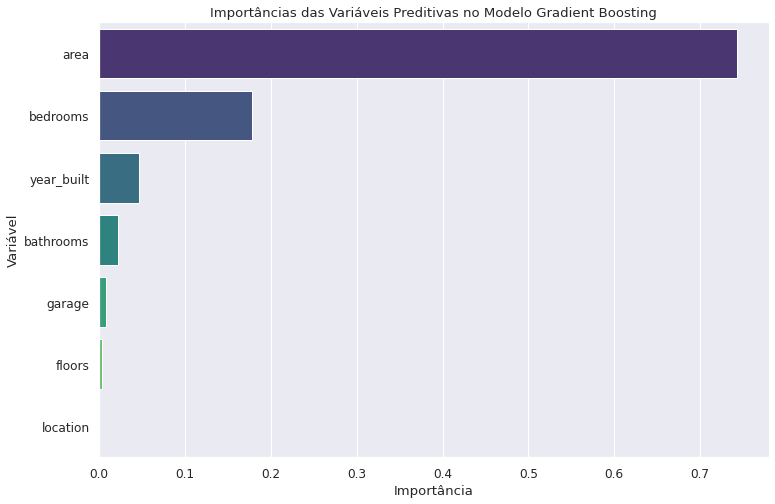

In [105]:
# Importância das variáveis preditoras
df_importance = pd.DataFrame(modelo_v9_GB.feature_importances_, X.columns, columns=['Importância'])
df_importance = df_importance.sort_values(by='Importância', ascending=False).reset_index()
df_importance.rename(columns={'index': 'Variável'}, inplace=True)

# Visualizando DataFrame
print(df_importance)

# Visualização Gráfica das importâncias das variáveis preditoras
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance, palette='viridis')
plt.title('Importâncias das Variáveis Preditivas no Modelo Gradient Boosting')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [106]:
# Previsões com dados de teste
pred_v9 = modelo_v9_GB.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v9[:10])

[480241.84213141 533880.82736535 723378.42893859 748385.36522194
 586174.15266135 531203.11975479 455155.34022514 845028.19694477
 609921.83355754 560660.95578287]


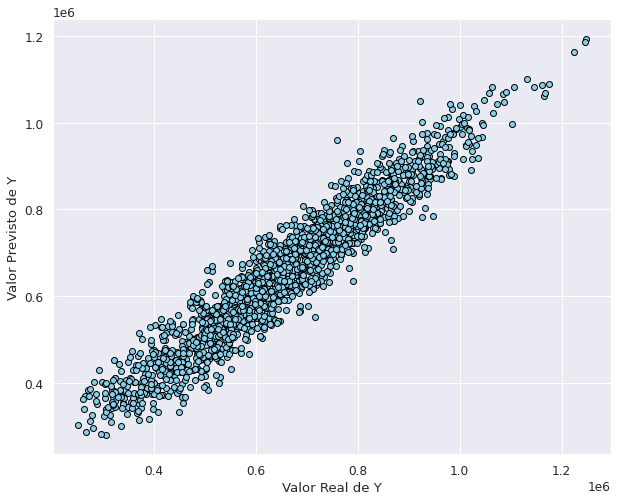

In [107]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v9, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [108]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v9)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v9)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médiopred_v8
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v9)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v9)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 41159.898378400394
MSE - Erro Quadrático Médio: 2645580848.681699
RMSE - Raiz Quadrada do Erro Quadrático Médio: 51435.210203533716
O valor é 51435.21 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.9120677782454075
Variância Explicada: 0.9120679804260086


#### Análise de Resíduos

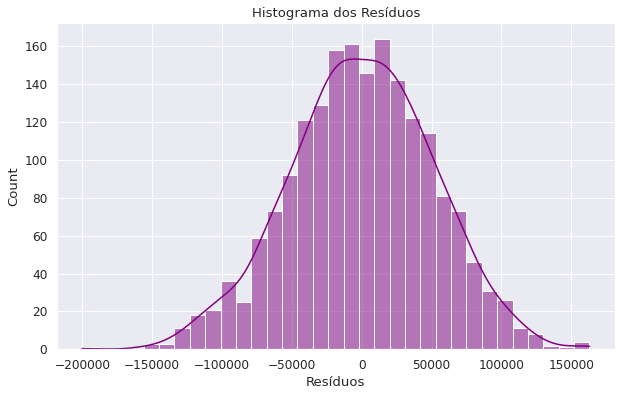

In [109]:
# Plot dos resíduos
residuos = y_teste - pred_v9

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [110]:
# Salvando as métricas no dataframe com formatação
modelo_v9 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 9 GB V1'],
    'Nome do Algoritmo': ['Gradient Boosting Regressor'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v9], ignore_index=True)

In [111]:
# Visualizando o Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
5,Modelo 5 DT,Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262
6,Modelo 6 RF,Random Forest,44033.68,3020908256.56,54962.789745,0.899593,0.899616
7,Modelo 7 SVR,SVR,41679.86,2709461576.20,52052.488665,0.909945,0.909945
8,Modelo 8 KNN,KNN,52069.55,4297998634.91,65559.123201,0.857146,0.857394
9,Modelo 9 GB V1,Gradient Boosting Regressor,41159.90,2645580848.68,51435.210204,0.912068,0.912068


<br><br>

## Versão 2

- Modelo com ajuste dos hiperparâmetros.


### Criação e Treinamento do Modelo

In [112]:
# Definindo o modelo
modelo_v9_GB = GradientBoostingRegressor(random_state=1234)

# Definindo os parâmetros para a busca em grade
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Realizando a busca em grade
grid_search_v9 = GridSearchCV(estimator=modelo_v9_GB, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_v9.fit(X_treino, y_treino)

# Melhor combinação de hiperparâmetros
melhor_param_v9 = grid_search_v9.best_params_
print(f"Melhor combinação de hiperparâmetros para Gradient Boosting Regressor: {melhor_param_v9}")

# Recriando o modelo com a melhor combinação de hiperparâmetros
modelo_v9_GB = GradientBoostingRegressor(**melhor_param_v9, random_state=1234)
modelo_v9_GB.fit(X_treino, y_treino)


Melhor combinação de hiperparâmetros para Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


GradientBoostingRegressor(random_state=1234)

In [113]:
# Previsões com dados de teste
pred_v9 = modelo_v9_GB.predict(X_teste)

# Avaliação do Modelo

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v9)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v9)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médiopred_v8
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v9)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v9)
print('Variância Explicada:', evs)

MAE - Erro Médio Absoluto: 41159.898378400394
MSE - Erro Quadrático Médio: 2645580848.681699
RMSE - Raiz Quadrada do Erro Quadrático Médio: 51435.210203533716
O valor é 51435.21 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.9120677782454075
Variância Explicada: 0.9120679804260086


<br>

### Salvando as Métricas

In [114]:
# Salvando as métricas no dataframe com formatação
modelo_v9 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 9 GB V2'],
    'Nome do Algoritmo': ['Gradient Boosting Regressor'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v9], ignore_index=True)

In [115]:
# Visualizando o Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
5,Modelo 5 DT,Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262
6,Modelo 6 RF,Random Forest,44033.68,3020908256.56,54962.789745,0.899593,0.899616
7,Modelo 7 SVR,SVR,41679.86,2709461576.20,52052.488665,0.909945,0.909945
8,Modelo 8 KNN,KNN,52069.55,4297998634.91,65559.123201,0.857146,0.857394
9,Modelo 9 GB V1,Gradient Boosting Regressor,41159.90,2645580848.68,51435.210204,0.912068,0.912068


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 10 com XGBoost Regressor</span>

- Uma implementação eficiente de gradient boosting, amplamente utilizada em competições de machine learning.

### Criação e Treinamento do Modelo

In [116]:
# Cria o modelo
modelo_v10_XGB = xgb.XGBRegressor(n_estimators=100, random_state=1234)

# Treinamento
modelo_v10_XGB.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=1234, ...)

#### Visualizando coeficientes das variáveis preditoras

     Variável  Importância
0        area     0.490139
1    bedrooms     0.326712
2   bathrooms     0.066240
3  year_built     0.048451
4      garage     0.030850
5      floors     0.025589
6    location     0.012019


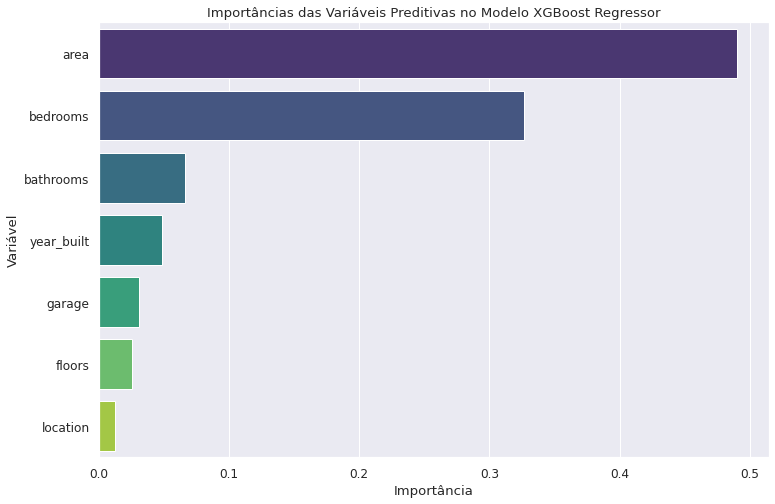

In [117]:
# Importância das variáveis preditoras
df_importance = pd.DataFrame(modelo_v10_XGB.feature_importances_, X.columns, columns=['Importância'])
df_importance = df_importance.sort_values(by='Importância', ascending=False).reset_index()
df_importance.rename(columns={'index': 'Variável'}, inplace=True)

# Visualizando DataFrame
print(df_importance)

# Visualização Gráfica das importâncias das variáveis preditoras
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=df_importance, palette='viridis')
plt.title('Importâncias das Variáveis Preditivas no Modelo XGBoost Regressor')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

<br>

## Previsões

In [118]:
# Previsões com dados de teste
pred_v10 = modelo_v10_XGB.predict(X_teste)

# Imprime as 10 primeiras previsões
print(pred_v10[:10])

[521350.6  536331.   714891.25 750080.56 559367.7  526884.44 456807.1
 855095.2  604504.9  545793.56]


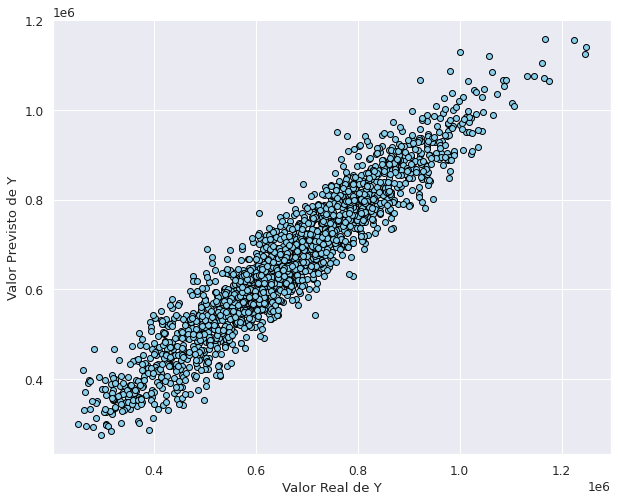

In [119]:
# Plot das previsões vs valores reais
plt.figure(figsize=(10, 8))
plt.scatter(x=y_teste, y=pred_v10, color='skyblue', edgecolors='black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

<br>

## Avaliação do Modelo

In [120]:
# Métricas de Avaliação

# Valor médio gasto pelos clientes
print('Valor médio gasto pelos clientes:', dados['value'].mean())

# Valor mínimo
print('Valor mínimo gasto pelos clientes:', dados['value'].min())

# Valor máximo
print('Valor máximo gasto pelos clientes:', dados['value'].max())

# MAE - Erro Médio Absoluto
mae = mean_absolute_error(y_teste, pred_v10)
print('MAE - Erro Médio Absoluto:', mae)

# MSE - Erro Quadrático Médio
mse = mean_squared_error(y_teste, pred_v10)
print('MSE - Erro Quadrático Médio:', mse)

# RMSE - Raiz Quadrada do Erro Quadrático Médiopred_v8
rmse = np.sqrt(mse)
print('RMSE - Raiz Quadrada do Erro Quadrático Médio:', rmse)

# Avaliação do RMSE em relação à média e ao desvio padrão
mean_value = dados['value'].mean()
std_value = dados['value'].std()
half_std_value = std_value / 2
rmse_as_percentage_of_mean = (rmse / mean_value) * 100
rmse_as_percentage_of_std = (rmse / std_value) * 100

if rmse < half_std_value:
    print(f'O valor é {rmse:.2f} e está MENOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso é BOM sinal.')
else:
    print(f'O valor é {rmse:.2f} e está MAIOR que a metade do desvio padrão dos valores da variável alvo ({half_std_value:.2f}). Isso NÃO é um bom sinal.')

# Coeficiente R2
r2 = r2_score(y_teste, pred_v10)
print('Coeficiente R2:', r2)

# Variância Explicada
evs = explained_variance_score(y_teste, pred_v10)
print('Variância Explicada:', evs)

Valor médio gasto pelos clientes: 656984.7737967459
Valor mínimo gasto pelos clientes: 252368.2339024256
Valor máximo gasto pelos clientes: 1276325.8111984583
MAE - Erro Médio Absoluto: 44118.07134833679
MSE - Erro Quadrático Médio: 3044556286.7809477
RMSE - Raiz Quadrada do Erro Quadrático Médio: 55177.498011245014
O valor é 55177.50 e está MENOR que a metade do desvio padrão dos valores da variável alvo (86769.60). Isso é BOM sinal.
Coeficiente R2: 0.8988068730967099
Variância Explicada: 0.8988081519764343


#### Análise de Resíduos

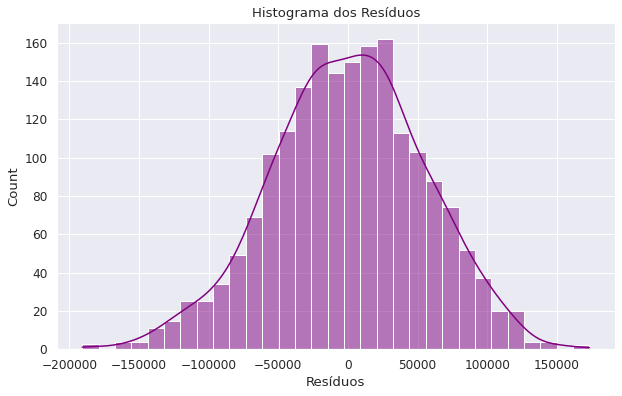

In [121]:
# Plot dos resíduos
residuos = y_teste - pred_v10

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [122]:
# Salvando as métricas no dataframe com formatação
modelo_v10 = pd.DataFrame({
    'Nome do Modelo': ['Modelo 10 XGB'],
    'Nome do Algoritmo': ['XGBoost'],
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

df_modelos = pd.concat([df_modelos, modelo_v10], ignore_index=True)

In [123]:
# Visualizando Dataframe
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
5,Modelo 5 DT,Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262
6,Modelo 6 RF,Random Forest,44033.68,3020908256.56,54962.789745,0.899593,0.899616
7,Modelo 7 SVR,SVR,41679.86,2709461576.20,52052.488665,0.909945,0.909945
8,Modelo 8 KNN,KNN,52069.55,4297998634.91,65559.123201,0.857146,0.857394
9,Modelo 9 GB V1,Gradient Boosting Regressor,41159.90,2645580848.68,51435.210204,0.912068,0.912068


<br><br>

# Seleção do Melhor Modelo

- Usando o RMSE como métrica de avaliação.

In [124]:
# Visualizando Dataframe com Métricas
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
4,Modelo 4 EN,ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
5,Modelo 5 DT,Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262
6,Modelo 6 RF,Random Forest,44033.68,3020908256.56,54962.789745,0.899593,0.899616
7,Modelo 7 SVR,SVR,41679.86,2709461576.20,52052.488665,0.909945,0.909945
8,Modelo 8 KNN,KNN,52069.55,4297998634.91,65559.123201,0.857146,0.857394
9,Modelo 9 GB V1,Gradient Boosting Regressor,41159.90,2645580848.68,51435.210204,0.912068,0.912068


In [125]:
# Visualizando os 4 melhores modelos (critério: menor valor de RMSE)
melhores_modelos = df_modelos.nsmallest(4, 'RMSE')

# Exibe os 4 melhores modelos
display(melhores_modelos)

,Nome do Modelo,Nome do Algoritmo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,Regressão Linear,40150.24,2513890239.52,50138.709991,0.916445,0.916447
3,Modelo 3 RL,Regressão Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
2,Modelo 2 RR V2,Regressão Ridge,40150.24,2513890717.06,50138.714753,0.916445,0.916447
1,Modelo 2 RR V1,Regressão Ridge,40150.67,2513938475.07,50139.191009,0.916443,0.916445


<br>

### Explicação da Escolha do <u>Melhor Modelo</u>

<br>

> O melhor modelo é o **Modelo 1: Regressão Linear**.

#### Justificativa:

- **Métrica de Escolha**: A métrica escolhida foi o **RMSE (Raiz Quadrada do Erro Quadrático Médio)**, pois é uma métrica comum em problemas de regressão que penaliza fortemente grandes erros, fornecendo uma boa indicação da precisão do modelo.

- **RMSE**: O RMSE do Modelo 1 (50138.71) é o menor entre todos os modelos, indicando que ele tem o menor erro de previsão.

- **Simplicidade**: A Regressão Linear é um modelo simples e interpretável, o que facilita a explicação dos resultados e das influências das variáveis preditoras.

- **Desempenho Consistente**: O Modelo 1 também tem um alto coeficiente R² (0.916445), mostrando que o modelo explica bem a variabilidade dos dados.

<br>

> Embora modelos mais complexos como Gradient Boosting e Random Forest também apresentem um bom desempenho, a **simplicidade e a alta interpretabilidade da Regressão Linear, aliadas ao menor RMSE, fazem dela a melhor escolha**.

> Em muitos cenários de negócios, **a interpretabilidade e a simplicidade são altamente valorizadas**, especialmente quando a **diferença no desempenho preditivo é pequena**.

<br><br><br><br>
<span style="color: green; font-size: 40px; font-weight: bold;"> Conclusão </span>

<br>

In [126]:
# Visualizando os dados
dados.head()

,area,bedrooms,bathrooms,floors,year_built,location,garage,value
0,174.835708,2.0,2.0,2.0,1919.0,1,3.0,664379.908882
1,143.086785,1.0,1.0,2.0,1959.0,1,0.0,501897.679702
2,182.384427,5.0,2.0,1.0,1939.0,0,1.0,803255.932459
3,226.151493,2.0,3.0,1.0,1982.0,4,2.0,922852.429946
4,138.292331,1.0,2.0,1.0,2001.0,0,1.0,433672.784015


<br>

### Visualizando Coeficientes do Melhor Modelo

In [127]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1_RL.coef_, X.columns, columns=['Coeficiente'])
df_coef_final = df_coef_final.sort_values(by='Coeficiente', ascending=False)
display(df_coef_final)

,Coeficiente
area,143817.730025
bedrooms,69954.060360
year_built,35755.182681
bathrooms,24812.997807
garage,15188.803916
floors,9422.885410
location,1130.528587


<br>

### Pergunta de Negócio

- Como podemos prever o valor de venda de uma propriedade residencial com base em suas características?

<br>

### Respondendo Pergunta de Negócio

Utilizando o modelo de Regressão Linear, é possível prever o valor de venda de uma propriedade residencial com base nas seguintes características:

- **Área (m²)**: Cada aumento de 1 m² na área aumenta o valor do imóvel em média em 143,817.73 unidades monetárias.
- **Quartos**: Cada quarto adicional aumenta o valor do imóvel em média em 69,954.06 unidades monetárias.
- **Ano de Construção**: Cada ano mais recente de construção aumenta o valor do imóvel em média em 35,755.18 unidades monetárias.
- **Banheiros**: Cada banheiro adicional aumenta o valor do imóvel em média em 24,812.99 unidades monetárias.
- **Vagas na Garagem**: Cada vaga adicional na garagem aumenta o valor do imóvel em média em 15,188.80 unidades monetárias.
- **Andares**: Cada andar adicional aumenta o valor do imóvel em média em 9,422.89 unidades monetárias.
- **Localização**: Cada mudança na localização, conforme codificação, aumenta o valor do imóvel em média em 1,130.53 unidades monetárias.

#### Conclusão

- O modelo de **Regressão Linear** permite prever de forma objetiva e precisa o valor de venda de uma propriedade residencial com base nas suas características principais.

<br>

### Testando o Modelo

In [128]:
# Características da propriedade
area = 150         # metros quadrados
bedrooms = 3       # número de quartos
year_built = 2000  # ano de construção
bathrooms = 2      # número de banheiros
garage = 1         # número de vagas na garagem
floors = 1         # número de andares
location = 1       # codificação da localização

# Criando o DataFrame com as características da propriedade
propriedade_df = pd.DataFrame([[area, bedrooms, bathrooms, floors, year_built, location, garage]], 
                              columns=['area', 'bedrooms', 'bathrooms', 'floors', 'year_built', 'location', 'garage'])

# Padronizando os dados da propriedade com o mesmo scaler utilizado anteriormente
propriedade_scaled = scaler.transform(propriedade_df)

# Prevendo o valor do imóvel usando o modelo treinado
valor_imovel = modelo_v1_RL.predict(propriedade_scaled)

# Exibindo o resultado
print(f"Valor do imóvel para as características fornecidas: {valor_imovel[0]:.2f} unidades monetárias")


# Características da propriedade
area = 174.83      # metros quadrados
bedrooms = 2       # número de quartos
year_built = 1919  # ano de construção
bathrooms = 2      # número de banheiros
garage = 3         # número de vagas na garagem
floors = 2         # número de andares
location = 1       # codificação da localização

# Criando o DataFrame com as características da propriedade
propriedade_df = pd.DataFrame([[area, bedrooms, bathrooms, floors, year_built, location, garage]], 
                              columns=['area', 'bedrooms', 'bathrooms', 'floors', 'year_built', 'location', 'garage'])

# Padronizando os dados da propriedade com o mesmo scaler utilizado anteriormente
propriedade_scaled = scaler.transform(propriedade_df)

# Prevendo o valor do imóvel usando o modelo treinado
valor_imovel = modelo_v1_RL.predict(propriedade_scaled)

# Exibindo o resultado
print(f"Valor do imóvel 2 para as características fornecidas: {valor_imovel[0]:.2f} unidades monetárias")

Valor do imóvel para as características fornecidas: 675753.94 unidades monetárias
Valor do imóvel 2 para as características fornecidas: 663648.21 unidades monetárias


/home/eduardo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/eduardo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [129]:
## Eliminando Aviso de Warning

# Definindo características das propriedades
propriedades = [
    [150, 3, 2, 1, 2000, 1, 1],  # Propriedade 1
    [174.83, 2, 2, 2, 1919, 1, 3]  # Propriedade 2
]

# Criando o DataFrame com as características das propriedades
propriedades_df = pd.DataFrame(propriedades, columns=['area', 'bedrooms', 'bathrooms', 'floors', 'year_built', 'location', 'garage'])

# Padronizando os dados das propriedades com o mesmo scaler utilizado anteriormente
propriedades_scaled = pd.DataFrame(scaler.transform(propriedades_df), columns=propriedades_df.columns)

# Prevendo o valor dos imóveis usando o modelo treinado
valores_imoveis = modelo_v1_RL.predict(propriedades_scaled)

# Exibindo os resultados
for i, valor in enumerate(valores_imoveis, start=1):
    print(f"Valor do imóvel {i} para as características fornecidas: {valor:.2f} unidades monetárias")

Valor do imóvel 1 para as características fornecidas: 675753.94 unidades monetárias
Valor do imóvel 2 para as características fornecidas: 663648.21 unidades monetárias


<br><br><br><br><br>
<span style="color: green; font-size: 40px; font-weight: bold;"> RESUMO DO PROJETO </span>

<br>

# Resumo do Projeto: Prevendo o Valor de Propriedades Imobiliárias

## Contexto
Uma empresa de corretagem imobiliária quer melhorar suas estimativas de preços de venda para propriedades residenciais. Usando modelos de regressão, o objetivo é prever o valor de uma casa com base em características específicas, ajudando corretores a fornecer estimativas de preço mais precisas para seus clientes.

## Problema de Negócio
**Como podemos prever o valor de venda de uma propriedade residencial com base em suas características?**

## Conjunto de Dados
O conjunto de dados simulado contém 10.000 registros com as seguintes colunas:
- Área da propriedade (m²)
- Número de quartos
- Número de banheiros
- Número de andares
- Ano de construção
- Localização (bairro ou cidade)
- Número de vagas na garagem
- Valor de venda da propriedade (variável alvo)

## Análise Exploratória de Dados

### Variáveis Numéricas
- A área da propriedade, número de quartos, banheiros, andares, ano de construção, e vagas na garagem foram analisados estatisticamente e visualizados por meio de histogramas.
- A área mostrou uma variação significativa entre as propriedades.
- O valor das propriedades apresentou uma distribuição assimétrica com outliers de alto valor.

### Variável Categórica
- A localização foi codificada como numérica para inclusão nos modelos de regressão.
- A maior parte das propriedades está localizada na Zona Oeste.

## Limpeza de Dados
- Foram tratados valores ausentes e duplicados.
- Outliers nos valores das propriedades foram removidos para melhorar a qualidade do modelo.

## Verificação de Correlação
- A área da propriedade foi a variável que mais influenciou o valor de venda.
- A correlação entre as variáveis preditivas foi baixa, indicando pouca multicolinearidade.

## Pré-Processamento de Dados
- Os dados foram divididos em conjuntos de treino e teste.
- As variáveis preditoras foram padronizadas para garantir consistência nos modelos.

## Construção e Avaliação dos Modelos de Machine Learning

### Modelos Testados
1. Regressão Linear (Benchmark)
2. Regressão Ridge
3. Regressão Lasso
4. ElasticNet
5. Árvores de Decisão
6. Random Forest
7. SVR (Support Vector Regressor)
8. K-Nearest Neighbors Regressor (KNN)
9. Gradient Boosting Regressor
10. XGBoost Regressor

### Avaliação dos Modelos
- Os modelos foram avaliados com métricas como MAE, MSE, RMSE e R².
- O modelo de Regressão Linear foi escolhido como o melhor, com o menor RMSE e alta interpretabilidade.

## Resultados e Conclusão
- A Regressão Linear mostrou-se eficaz para prever o valor das propriedades com base em suas características.
- A simplicidade e alta interpretabilidade do modelo o tornaram a melhor escolha para a empresa de corretagem.

## Resposta à Pergunta de Negócio
Utilizando o modelo de Regressão Linear, é possível prever o valor de venda de uma propriedade residencial com base em suas características principais. Este modelo fornece uma estimativa precisa e fácil de interpretar, ajudando corretores a fornecer preços mais precisos aos clientes e a fechar negócios mais rapidamente.

### Exemplo Rápido
Para uma propriedade com 150 m², 3 quartos, construída em 2000, com 2 banheiros, 1 vaga na garagem, 1 andar e localizada na Zona Norte:
- O valor estimado pelo modelo é aproximadamente 675,754 unidades monetárias.

Para uma propriedade com 174.83 m², 2 quartos, construída em 1919, com 2 banheiros, 3 vagas na garagem, 2 andares e localizada na Zona Norte:
- O valor estimado pelo modelo é aproximadamente 663,648 unidades monetárias.

## Conclusão
O modelo de Regressão Linear foi eficaz em prever os valores das propriedades, fornecendo uma ferramenta valiosa para a empresa de corretagem melhorar suas estimativas de preços de venda.


<br><br><br><br>

# RODANDO TODOS OS MODELOS EM UM ÚNICO BLOCO DE CÓDIGO

In [130]:
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import pandas as pd
import numpy as np

# DataFrame para armazenar as métricas
df_modelos_unico_bloco = pd.DataFrame()

def avalia_modelo(nome_modelo, modelo, X_treino, y_treino, X_teste, y_teste, df_modelos_unico_bloco):
    # Treinamento
    modelo.fit(X_treino, y_treino)
    # Previsões
    pred = modelo.predict(X_teste)
    # Avaliação
    mae = mean_absolute_error(y_teste, pred)
    mse = mean_squared_error(y_teste, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_teste, pred)
    evs = explained_variance_score(y_teste, pred)
    half_std_value = dados['value'].std() / 2
    if rmse < half_std_value:
        sinal = 'BOM'
    else:
        sinal = 'NÃO é um bom'
    print(f'O valor de RMSE para o {nome_modelo} é {rmse:.2f} e isso é um {sinal} sinal.')
    # Salvando as métricas no dataframe
    df_modelo = pd.DataFrame({
        'Nome do Modelo': [nome_modelo],
        'MAE': [f"{mae:.2f}"],
        'MSE': [f"{mse:.2f}"],
        'RMSE': [rmse],
        'Coeficiente R2': [r2],
        'Variância Explicada': [evs]
    })
    return pd.concat([df_modelos_unico_bloco, df_modelo], ignore_index=True)

# Modelos
modelos = {
    "Modelo 1 RL": LinearRegression(),
    "Modelo 2 RR": Ridge(alpha=1.0),
    "Modelo 3 Lasso": Lasso(alpha=1.0),
    "Modelo 4 ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Modelo 5 Árvore de Decisão": DecisionTreeRegressor(random_state=1234),
    "Modelo 6 Random Forest": RandomForestRegressor(n_estimators=100, random_state=1234),
    "Modelo 7 SVR": SVR(kernel='linear', C=1.0),
    "Modelo 8 KNN": KNeighborsRegressor(n_neighbors=5),
    "Modelo 9 Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=1234),
    "Modelo 10 XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=1234)
}

# Avaliação de cada modelo
for nome_modelo, modelo in modelos.items():
    df_modelos_unico_bloco = avalia_modelo(nome_modelo, modelo, X_treino, y_treino, X_teste, y_teste, df_modelos_unico_bloco)

# Visualizando Dataframe
display(df_modelos_unico_bloco)


O valor de RMSE para o Modelo 1 RL é 50138.71 e isso é um BOM sinal.
O valor de RMSE para o Modelo 2 RR é 50139.19 e isso é um BOM sinal.
O valor de RMSE para o Modelo 3 Lasso é 50138.71 e isso é um BOM sinal.
O valor de RMSE para o Modelo 4 ElasticNet é 75543.31 e isso é um BOM sinal.
O valor de RMSE para o Modelo 5 Árvore de Decisão é 74754.57 e isso é um BOM sinal.
O valor de RMSE para o Modelo 6 Random Forest é 54962.79 e isso é um BOM sinal.
O valor de RMSE para o Modelo 7 SVR é 168106.02 e isso é um NÃO é um bom sinal.
O valor de RMSE para o Modelo 8 KNN é 65559.12 e isso é um BOM sinal.
O valor de RMSE para o Modelo 9 Gradient Boosting é 51435.21 e isso é um BOM sinal.
O valor de RMSE para o Modelo 10 XGBoost é 55177.50 e isso é um BOM sinal.


,Nome do Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Modelo 1 RL,40150.24,2513890239.52,50138.709991,0.916445,0.916447
1,Modelo 2 RR,40150.67,2513938475.07,50139.191009,0.916443,0.916445
2,Modelo 3 Lasso,40150.25,2513890572.81,50138.713314,0.916445,0.916447
3,Modelo 4 ElasticNet,60456.77,5706792373.81,75543.314554,0.810321,0.810396
4,Modelo 5 Árvore de Decisão,59601.85,5588245812.48,74754.570512,0.814261,0.814262
5,Modelo 6 Random Forest,44033.68,3020908256.56,54962.789745,0.899593,0.899616
6,Modelo 7 SVR,136348.13,28259634475.64,168106.021533,0.060723,0.062170
7,Modelo 8 KNN,52069.55,4297998634.91,65559.123201,0.857146,0.857394
8,Modelo 9 Gradient Boosting,41159.90,2645580848.68,51435.210204,0.912068,0.912068
9,Modelo 10 XGBoost,44118.07,3044556286.78,55177.498011,0.898807,0.898808


<br><br>

# FIM